# <div style="color: brown; background-color: white; padding: 10px;">__Exploring the Hyderabad Best Doctors through Web Scraping and Data Analysis Project.__</div>


## Problem Statement

#### To analyze the Doctors in Hyderabad, a web scraping and exploratory data analysis project will be conducted using the website Practo Doctors. The goal of this project is to gather and analyze data on Best Doctors in Hyderabad, including information on Specialization,Locality,Hospital Name,Consulation Fee,Rating & Reviews. The collected data will be used to get the information of the Doctors, and to find the Best Doctors in Hyderabad. 

In [59]:
# Installing BeautifulSoup

! pip install bs4

In [2]:
# Loading required libraries

import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

### Data Collected from the Web Site- Practo Doctors

In [61]:
# Identify the URL

URL ="https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22doctor%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22type%22%7D%5D&city=Hyderabad"

In [62]:
# Loading the WebPage in Memory using requests library

#requests.get(URL) 
page=requests.get(URL)
page

<Response [200]>

In [63]:
htmlCode=page.text
htmlCode

'<!DOCTYPE html><html><head><title>Best Doctors In Hyderabad - Book Appointment Online, View Fees, Recommendations | Practo</title><meta name="description" content="Best Doctors in Hyderabad. Book Doctor&#x27;s Appointment Online, View Fees, User feedbacks, Address &amp; Phone Numbers of doctorss in Hyderabad | Practo"/><meta charSet="utf-8"/><meta http-equiv="x-ua-compatible" content="ie=edge"/><script nonce="46gDN7BLCddj0Q1qaXmXCNhQBwFHQNDI" type="text/javascript">(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n                      new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n                      j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n                      \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n                      })(window,document,\'script\',\'dataLayer\',"GTM-PSMVGL5");</script><script nonce="46gDN7BLCddj0Q1qaXmXCNhQBwFHQNDI" type="text/javascript"

In [64]:
soup = BeautifulSoup(htmlCode)
print(soup)

<!DOCTYPE html>
<html><head><title>Best Doctors In Hyderabad - Book Appointment Online, View Fees, Recommendations | Practo</title><meta content="Best Doctors in Hyderabad. Book Doctor's Appointment Online, View Fees, User feedbacks, Address &amp; Phone Numbers of doctorss in Hyderabad | Practo" name="description"/><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><script nonce="46gDN7BLCddj0Q1qaXmXCNhQBwFHQNDI" type="text/javascript">(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
                      new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
                      j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
                      'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
                      })(window,document,'script','dataLayer',"GTM-PSMVGL5");</script><script nonce="46gDN7BLCddj0Q1qaXmXCNhQBwFHQNDI" type="text/javascript">LUX=(function(){var a=("

In [65]:
for i in range(1,55):
       print('https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22doctor%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22type%22%7D%5D&city=Hyderabad&page={}'.format(i))

https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22doctor%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22type%22%7D%5D&city=Hyderabad&page=1
https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22doctor%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22type%22%7D%5D&city=Hyderabad&page=2
https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22doctor%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22type%22%7D%5D&city=Hyderabad&page=3
https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22doctor%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22type%22%7D%5D&city=Hyderabad&page=4
https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22doctor%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22type%22%7D%5D&city=Hyderabad&page=5
https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22doctor%22%2C%22autocomp

##  Importing tags and classes from the website 

#### Main_class     --> tag ="div"  class="u-border-general--bottom"

#### Doctor_Name    --> tag = 'h2'  class = "doctor-name"
 
#### Hospital_Name ---> tag = "p"  class = "u-spacer--left-12 u-color--dark-blue u-base-font"


#### location      ---> tag = "div"  class = ""u-bold u-d-inlineblock u-valign--middle""
    
#### Consultation_fee---> tag = "span" attrs = "data-qa-id":"consultation_fee"
    
#### Rating         ---> tag = "span" class = ""o-label--success u-bold""
    
#### Review         ---> tag = "span" class = "u-bold u-t-underline"

#### Specialization ---> tag = "div" class = "listing-doctor-card"


### Generating Data Frame From the URL

In [66]:
# Scrapping the Web Page

Doctor_Name = []
Experience = []
Location = []
Consultation_fee=[]
Rating=[]
Review=[]
Hospital_Name = []

for i in range(1,60):
    URL = 'https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22doctor%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22type%22%7D%5D&city=Hyderabad&page={}'. format(i)
    
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    for x in soup.find_all('div', attrs={'class' : 'u-border-general--bottom'}):

        name=x.find("h2",class_="doctor-name")
        if name:
            
            b=(name.text)
            Doctor_Name.append(b)
        else:
            c=("NaN")
            Doctor_Name.append(c)
        
        profile=soup.find('p',class_='u-spacer--left-12 u-color--dark-blue u-base-font')
        profile1=soup.find('span',class_='u-c-pointer u-t-hover-underline')
        if profile:
            b=(profile.text)
            Hospital_Name.append(b)
         
        elif profile1:
            c=(profile1.text)
            Hospital_Name.append(c)
        else:
            d=("Nan")
            Hospital_Name.append(d)
            
    
        exp=x.find("div",class_="uv2-spacer--xs-top")
        if exp:    
            b=(exp.text)
            Experience.append(b)
        else:
            c='Nan'
            Experience.append(c)
            
        Loc=x.find("div",class_="u-bold u-d-inlineblock u-valign--middle")
        
        if Loc:    
            b=(Loc.text)
            Location.append(b)
        else:
            c=("NaN")
            Location.append(c)
    
        Fee=x.find("span",attrs={"data-qa-id":"consultation_fee"})
        if Fee:    
            b=(Fee.text)
            Consultation_fee.append(b)
        else:
            c=("NaN")
            Consultation_fee.append(c)
            
        Rate=x.find("span",class_="o-label--success u-bold")
        if Rate:    
            b=(Rate.text)
            Rating.append(b)
        else:
            c=("NaN")
            Rating.append(c)
            
        review=x.find("span",class_="u-bold u-t-underline")
        if review:    
            b=(review.text)
            Review.append(b)
        else:
            c=("NaN")
            Review.append(c)       
        

In [67]:
import re

In [68]:
Specialization=[]
for i in range(1,60):
    URL = 'https://www.practo.com/search/doctors?results_type=doctor&q=%5B%7B%22word%22%3A%22doctor%22%2C%22autocompleted%22%3Atrue%2C%22category%22%3A%22type%22%7D%5D&city=Hyderabad&page={}'.format(i)
    
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    doctors = soup.find_all('div', attrs={'class' : 'listing-doctor-card'})
    

      
    for x in doctors:
        a=x.find('div',class_="u-grey_3-text")
        
        if a:
            b=re.findall("(.*)\d+",a.text)
            Specialization.append(b)
        else:
            Specialization.append("NaN")

In [69]:
print(len(Doctor_Name))
print(len(Experience))
print(len(Location))
print(len(Consultation_fee))
print(len(Rating))
print(len(Review))
print(len(Hospital_Name))

591
591
591
591
591
591
591


In [70]:
print(len(Specialization))

590


In [71]:
df = pd.DataFrame({'Doctor_Name' : Doctor_Name,'Experience':Experience,'Location':Location,'Consultation_fee':Consultation_fee,'Rating' : Rating, 'Review' :Review, 'Hospital_Name' : Hospital_Name})

In [72]:
df.head()

Doctor_Name                   Experience  \
0                        NaN                          Nan   
1  Dr. Arun Kumar Nadimpalli  24 years experience overall   
2     Dr. Rajeshwar Kamineni  25 years experience overall   
3             Dr. Mohd Ilyas  15 years experience overall   
4            Dr. Kaushik B K  10 years experience overall   

                  Location Consultation_fee Rating              Review  \
0                      NaN              NaN    NaN                 NaN   
1     Somajiguda,Hyderabad             ₹600   90%   12 Patient Stories   
2       Kondapur,Hyderabad             ₹600  100%   27 Patient Stories   
3  Himayat Nagar,Hyderabad             ₹499   87%   13 Patient Stories   
4       SR Nagar,Hyderabad             ₹500   67%                  NaN   

                 Hospital_Name  
0  Assisted Surgery Experience  
1  Assisted Surgery Experience  
2  Assisted Surgery Experience  
3  Assisted Surgery Experience  
4  Assisted Surgery Experience

In [73]:
df1 = pd.DataFrame({"Specialization":Specialization})

In [74]:
df1.head()

Specialization
0      [Orthopedist2]
1  [General Surgeon2]
2  [General Surgeon1]
3      [Orthopedist1]
4  [General Surgeon1]

In [75]:
new_row={"Specialization":np.nan}
df1=df1.append(new_row,ignore_index=True)
df1.head()

C:\Users\SAI PRAVEEN YERRA\AppData\Local\Temp\ipykernel_35876\3903009793.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(new_row,ignore_index=True)


Specialization
0      [Orthopedist2]
1  [General Surgeon2]
2  [General Surgeon1]
3      [Orthopedist1]
4  [General Surgeon1]

In [76]:
df.drop(df.index[[0]],inplace=True)

In [77]:
df["s.no"]=range(1,len(df)+1)
df1["s.no"]=range(1,len(df1)+1)


In [78]:
df2 = pd.merge(df1, df, on='s.no', how='left')
df2

Specialization  s.no                 Doctor_Name  \
0        [Orthopedist2]     1   Dr. Arun Kumar Nadimpalli   
1    [General Surgeon2]     2      Dr. Rajeshwar Kamineni   
2    [General Surgeon1]     3              Dr. Mohd Ilyas   
3        [Orthopedist1]     4             Dr. Kaushik B K   
4    [General Surgeon1]     5           Dr. Parvez Ansari   
..                  ...   ...                         ...   
586           [Dentist]   587  Dr. Akula Lakshmi Prasanna   
587      [Radiologist2]   588    Dr. Rajesh Kumar Enagala   
588     [Pediatrician4]   589               Dr. S Sridevi   
589          [Dentist1]   590            Dr. Rajesh Aduri   
590                 NaN   591                         NaN   

                      Experience                 Location Consultation_fee  \
0    24 years experience overall     Somajiguda,Hyderabad             ₹600   
1    25 years experience overall       Kondapur,Hyderabad             ₹600   
2    15 years experience overall  Himayat Nagar,Hyderabad             ₹499   
3    10 years experience overall       SR Nagar,Hyderabad             ₹500   
4    19 years experience overall  Banjara Hills,Hyderabad             ₹499   
..                           ...                      ...              ...   
586   6 years experience overall     Kukatpally,Hyderabad             ₹300   
587  25 years experience overall  Banjara Hills,Hyderabad             ₹650   
588  47 years experience overall       Saidabad,Hyderabad             ₹350   
589  13 years experience overall   Dilsukhnagar,Hyderabad             ₹400   
590                          NaN                      NaN              NaN   

    Rating               Review                Hospital_Name  
0     90%    12 Patient Stories  Assisted Surgery Experience  
1    100%    27 Patient Stories  Assisted Surgery Experience  
2     87%    13 Patient Stories  Assisted Surgery Experience  
3     67%                   NaN  Assisted Surgery Experience  
4    100%     4 Patient Stories  Assisted Surgery Experience  
..     ...                  ...                          ...  
586  100%   134 Patient Stories               Hegde Hospital  
587  100%    20 Patient Stories               Hegde Hospital  
588   98%    29 Patient Stories               Hegde Hospital  
589   98%   139 Patient Stories               Hegde Hospital  
590    NaN                  NaN                          NaN  

[591 rows x 9 columns]

In [79]:
df2.drop('s.no', axis=1, inplace=True)


In [80]:
df2.head()

Specialization                Doctor_Name                   Experience  \
0      [Orthopedist2]  Dr. Arun Kumar Nadimpalli  24 years experience overall   
1  [General Surgeon2]     Dr. Rajeshwar Kamineni  25 years experience overall   
2  [General Surgeon1]             Dr. Mohd Ilyas  15 years experience overall   
3      [Orthopedist1]            Dr. Kaushik B K  10 years experience overall   
4  [General Surgeon1]          Dr. Parvez Ansari  19 years experience overall   

                  Location Consultation_fee Rating              Review  \
0     Somajiguda,Hyderabad             ₹600   90%   12 Patient Stories   
1       Kondapur,Hyderabad             ₹600  100%   27 Patient Stories   
2  Himayat Nagar,Hyderabad             ₹499   87%   13 Patient Stories   
3       SR Nagar,Hyderabad             ₹500   67%                  NaN   
4  Banjara Hills,Hyderabad             ₹499  100%    4 Patient Stories   

                 Hospital_Name  
0  Assisted Surgery Experience  
1  Assisted Surgery Experience  
2  Assisted Surgery Experience  
3  Assisted Surgery Experience  
4  Assisted Surgery Experience

##### Saving the Data Frame to CSV

In [81]:
df2.to_csv('Doctor1.csv')

In [3]:
df=pd.read_csv('Doctor1.csv')
df

Unnamed: 0        Specialization                 Doctor_Name  \
0             0      ['Orthopedist2']   Dr. Arun Kumar Nadimpalli   
1             1  ['General Surgeon2']      Dr. Rajeshwar Kamineni   
2             2  ['General Surgeon1']              Dr. Mohd Ilyas   
3             3      ['Orthopedist1']             Dr. Kaushik B K   
4             4  ['General Surgeon1']           Dr. Parvez Ansari   
..          ...                   ...                         ...   
586         586           ['Dentist']  Dr. Akula Lakshmi Prasanna   
587         587      ['Radiologist2']    Dr. Rajesh Kumar Enagala   
588         588     ['Pediatrician4']               Dr. S Sridevi   
589         589          ['Dentist1']            Dr. Rajesh Aduri   
590         590                   NaN                         NaN   

                      Experience                 Location Consultation_fee  \
0    24 years experience overall     Somajiguda,Hyderabad             ₹600   
1    25 years experience overall       Kondapur,Hyderabad             ₹600   
2    15 years experience overall  Himayat Nagar,Hyderabad             ₹499   
3    10 years experience overall       SR Nagar,Hyderabad             ₹500   
4    19 years experience overall  Banjara Hills,Hyderabad             ₹499   
..                           ...                      ...              ...   
586   6 years experience overall     Kukatpally,Hyderabad             ₹300   
587  25 years experience overall  Banjara Hills,Hyderabad             ₹650   
588  47 years experience overall       Saidabad,Hyderabad             ₹350   
589  13 years experience overall   Dilsukhnagar,Hyderabad             ₹400   
590                          NaN                      NaN              NaN   

    Rating               Review                Hospital_Name  
0     90%    12 Patient Stories  Assisted Surgery Experience  
1    100%    27 Patient Stories  Assisted Surgery Experience  
2     87%    13 Patient Stories  Assisted Surgery Experience  
3     67%                   NaN  Assisted Surgery Experience  
4    100%     4 Patient Stories  Assisted Surgery Experience  
..     ...                  ...                          ...  
586  100%   134 Patient Stories               Hegde Hospital  
587  100%    20 Patient Stories               Hegde Hospital  
588   98%    29 Patient Stories               Hegde Hospital  
589   98%   139 Patient Stories               Hegde Hospital  
590    NaN                  NaN                          NaN  

[591 rows x 9 columns]

## Data Cleaning

In [163]:
df=pd.read_csv('Doctor1.csv')
df.head()

Unnamed: 0        Specialization                Doctor_Name  \
0           0      ['Orthopedist2']  Dr. Arun Kumar Nadimpalli   
1           1  ['General Surgeon2']     Dr. Rajeshwar Kamineni   
2           2  ['General Surgeon1']             Dr. Mohd Ilyas   
3           3      ['Orthopedist1']            Dr. Kaushik B K   
4           4  ['General Surgeon1']          Dr. Parvez Ansari   

                    Experience                 Location Consultation_fee  \
0  24 years experience overall     Somajiguda,Hyderabad             ₹600   
1  25 years experience overall       Kondapur,Hyderabad             ₹600   
2  15 years experience overall  Himayat Nagar,Hyderabad             ₹499   
3  10 years experience overall       SR Nagar,Hyderabad             ₹500   
4  19 years experience overall  Banjara Hills,Hyderabad             ₹499   

  Rating              Review                Hospital_Name  
0   90%   12 Patient Stories  Assisted Surgery Experience  
1  100%   27 Patient Stories  Assisted Surgery Experience  
2   87%   13 Patient Stories  Assisted Surgery Experience  
3   67%                  NaN  Assisted Surgery Experience  
4  100%    4 Patient Stories  Assisted Surgery Experience

In [164]:
df['Rating'] = df2['Rating'].str.replace('%',' ')
df['Consultation_fee'] = df['Consultation_fee'].str.replace('₹',' ')
df.head()

Unnamed: 0        Specialization                Doctor_Name  \
0           0      ['Orthopedist2']  Dr. Arun Kumar Nadimpalli   
1           1  ['General Surgeon2']     Dr. Rajeshwar Kamineni   
2           2  ['General Surgeon1']             Dr. Mohd Ilyas   
3           3      ['Orthopedist1']            Dr. Kaushik B K   
4           4  ['General Surgeon1']          Dr. Parvez Ansari   

                    Experience                 Location Consultation_fee  \
0  24 years experience overall     Somajiguda,Hyderabad              600   
1  25 years experience overall       Kondapur,Hyderabad              600   
2  15 years experience overall  Himayat Nagar,Hyderabad              499   
3  10 years experience overall       SR Nagar,Hyderabad              500   
4  19 years experience overall  Banjara Hills,Hyderabad              499   

  Rating              Review                Hospital_Name  
0   90    12 Patient Stories  Assisted Surgery Experience  
1  100    27 Patient Stories  Assisted Surgery Experience  
2   87    13 Patient Stories  Assisted Surgery Experience  
3   67                   NaN  Assisted Surgery Experience  
4  100     4 Patient Stories  Assisted Surgery Experience

### Cleaning Data using Regex

In [165]:
df['Review'] = df['Review'].str.extract(r'(\d+)')
df['Experience'] = df['Experience'].str.extract(r'(\d+)')
df=df.rename(columns={"Experience":"Experience_Years"})
df.head()

Unnamed: 0        Specialization                Doctor_Name  \
0           0      ['Orthopedist2']  Dr. Arun Kumar Nadimpalli   
1           1  ['General Surgeon2']     Dr. Rajeshwar Kamineni   
2           2  ['General Surgeon1']             Dr. Mohd Ilyas   
3           3      ['Orthopedist1']            Dr. Kaushik B K   
4           4  ['General Surgeon1']          Dr. Parvez Ansari   

  Experience_Years                 Location Consultation_fee Rating Review  \
0               24     Somajiguda,Hyderabad              600   90       12   
1               25       Kondapur,Hyderabad              600  100       27   
2               15  Himayat Nagar,Hyderabad              499   87       13   
3               10       SR Nagar,Hyderabad              500   67      NaN   
4               19  Banjara Hills,Hyderabad              499  100        4   

                 Hospital_Name  
0  Assisted Surgery Experience  
1  Assisted Surgery Experience  
2  Assisted Surgery Experience  
3  Assisted Surgery Experience  
4  Assisted Surgery Experience

In [166]:
df['Specialization']=df['Specialization'].str.replace('[','').str.replace("]",'').str.replace("'"," ")
df['Specialization']

C:\Users\SAI PRAVEEN YERRA\AppData\Local\Temp\ipykernel_35876\1722451411.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Specialization']=df['Specialization'].str.replace('[','').str.replace("]",'').str.replace("'"," ")


0           Orthopedist2 
1       General Surgeon2 
2       General Surgeon1 
3           Orthopedist1 
4       General Surgeon1 
              ...        
586              Dentist 
587         Radiologist2 
588        Pediatrician4 
589             Dentist1 
590                   NaN
Name: Specialization, Length: 591, dtype: object

In [167]:
df['Specialization']=df['Specialization'].str.replace('\d','',regex=True)
df.head()

Unnamed: 0     Specialization                Doctor_Name Experience_Years  \
0           0       Orthopedist   Dr. Arun Kumar Nadimpalli               24   
1           1   General Surgeon      Dr. Rajeshwar Kamineni               25   
2           2   General Surgeon              Dr. Mohd Ilyas               15   
3           3       Orthopedist             Dr. Kaushik B K               10   
4           4   General Surgeon           Dr. Parvez Ansari               19   

                  Location Consultation_fee Rating Review  \
0     Somajiguda,Hyderabad              600   90       12   
1       Kondapur,Hyderabad              600  100       27   
2  Himayat Nagar,Hyderabad              499   87       13   
3       SR Nagar,Hyderabad              500   67      NaN   
4  Banjara Hills,Hyderabad              499  100        4   

                 Hospital_Name  
0  Assisted Surgery Experience  
1  Assisted Surgery Experience  
2  Assisted Surgery Experience  
3  Assisted Surgery Experience  
4  Assisted Surgery Experience

In [168]:
df.drop("Unnamed: 0",axis=1,inplace=True)


In [169]:
df.head()

Specialization                Doctor_Name Experience_Years  \
0       Orthopedist   Dr. Arun Kumar Nadimpalli               24   
1   General Surgeon      Dr. Rajeshwar Kamineni               25   
2   General Surgeon              Dr. Mohd Ilyas               15   
3       Orthopedist             Dr. Kaushik B K               10   
4   General Surgeon           Dr. Parvez Ansari               19   

                  Location Consultation_fee Rating Review  \
0     Somajiguda,Hyderabad              600   90       12   
1       Kondapur,Hyderabad              600  100       27   
2  Himayat Nagar,Hyderabad              499   87       13   
3       SR Nagar,Hyderabad              500   67      NaN   
4  Banjara Hills,Hyderabad              499  100        4   

                 Hospital_Name  
0  Assisted Surgery Experience  
1  Assisted Surgery Experience  
2  Assisted Surgery Experience  
3  Assisted Surgery Experience  
4  Assisted Surgery Experience

### Replacing undefined values into NaN 

In [170]:
df['Experience_Years'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Experience_Years'].fillna(value=0, inplace=True)
df['Experience_Years'] = df['Experience_Years'].astype(int)



In [172]:
df['Consultation_fee'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.loc[df['Consultation_fee']=="Free Consultation", 'Consultation_fee'] = 0
df['Consultation_fee'].fillna(0, inplace=True)
df['Consultation_fee'] = df['Consultation_fee'].astype(int)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 589
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Specialization    590 non-null    object
 1   Doctor_Name       590 non-null    object
 2   Experience_Years  590 non-null    int32 
 3   Location          590 non-null    object
 4   Consultation_fee  590 non-null    int32 
 5   Rating            590 non-null    object
 6   Review            523 non-null    object
 7   Hospital_Name     590 non-null    object
dtypes: int32(2), object(6)
memory usage: 36.9+ KB


In [118]:
df['Rating'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Rating'] = df['Rating'].str.strip().str.rstrip('%').astype(float)
df.dropna(subset=['Rating'], inplace=True)
df['Rating'] = df['Rating'].astype(int)
df.head()

Specialization                Doctor_Name  Experience_Years  \
0       Orthopedist   Dr. Arun Kumar Nadimpalli                24   
1   General Surgeon      Dr. Rajeshwar Kamineni                25   
2   General Surgeon              Dr. Mohd Ilyas                15   
3       Orthopedist             Dr. Kaushik B K                10   
4   General Surgeon           Dr. Parvez Ansari                19   

                  Location Consultation_fee  Rating Review  \
0     Somajiguda,Hyderabad              600      90     12   
1       Kondapur,Hyderabad              600     100     27   
2  Himayat Nagar,Hyderabad              499      87     13   
3       SR Nagar,Hyderabad              500      67    NaN   
4  Banjara Hills,Hyderabad              499     100      4   

                 Hospital_Name  
0  Assisted Surgery Experience  
1  Assisted Surgery Experience  
2  Assisted Surgery Experience  
3  Assisted Surgery Experience  
4  Assisted Surgery Experience

In [119]:
df['Review'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['Review'], inplace=True)
df['Review'] = df['Review'].astype(int)

df['Review'] 

0       12
1       27
2       13
4        4
5        2
      ... 
585     52
586    134
587     20
588     29
589    139
Name: Review, Length: 523, dtype: int32

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 0 to 589
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Specialization    523 non-null    object
 1   Doctor_Name       523 non-null    object
 2   Experience_Years  523 non-null    int32 
 3   Location          523 non-null    object
 4   Consultation_fee  522 non-null    object
 5   Rating            523 non-null    int32 
 6   Review            523 non-null    int32 
 7   Hospital_Name     523 non-null    object
dtypes: int32(3), object(5)
memory usage: 30.6+ KB


In [174]:
df.head()

Specialization                Doctor_Name  Experience_Years  \
0       Orthopedist   Dr. Arun Kumar Nadimpalli                24   
1   General Surgeon      Dr. Rajeshwar Kamineni                25   
2   General Surgeon              Dr. Mohd Ilyas                15   
3       Orthopedist             Dr. Kaushik B K                10   
4   General Surgeon           Dr. Parvez Ansari                19   

                  Location  Consultation_fee Rating Review  \
0     Somajiguda,Hyderabad               600   90       12   
1       Kondapur,Hyderabad               600  100       27   
2  Himayat Nagar,Hyderabad               499   87       13   
3       SR Nagar,Hyderabad               500   67      NaN   
4  Banjara Hills,Hyderabad               499  100        4   

                 Hospital_Name  
0  Assisted Surgery Experience  
1  Assisted Surgery Experience  
2  Assisted Surgery Experience  
3  Assisted Surgery Experience  
4  Assisted Surgery Experience

In [192]:
df=df.dropna()

In [193]:
df.isna().sum()

Specialization      0
Doctor_Name         0
Experience_Years    0
Location            0
Consultation_fee    0
Rating              0
Review              0
Hospital_Name       0
dtype: int64

In [194]:
df['Locality'] = df['Location'].str.replace(",Hyderabad", "")
df['Locality']

C:\Users\SAI PRAVEEN YERRA\AppData\Local\Temp\ipykernel_35876\190711500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Locality'] = df['Location'].str.replace(",Hyderabad", "")


20           Nizampet
21               KPHB
22               KPHB
23        Mehdipatnam
24       Secunderabad
            ...      
541        Lakdikapul
542    Padmarao Nagar
543        Kukatpally
544          Saidabad
545      Dilsukhnagar
Name: Locality, Length: 462, dtype: object

In [195]:
df.to_csv("Doctor_Data1.csv")

In [4]:
df=pd.read_csv("Doctor_Data1.csv")
df

Unnamed: 0                      Specialization  \
0            20                 Gastroenterologist    
1            21                  Internal Medicine    
2            22                  General Physician    
3            23                  General Physician    
4            24                  Internal Medicine    
..          ...                                 ...   
457         541   Ear-Nose-Throat (ENT) Specialist    
458         542                      \xaHomoeopath    
459         543                            Dentist    
460         544                       Pediatrician    
461         545                            Dentist    

                               Doctor_Name  Experience_Years  \
0                    Dr. Seetharam Kumar D                27   
1                     Dr. Kembavi Srinivas                37   
2    Dr. L Kiran Kumar   (Physiotherapist)                17   
3                   Dr. M. S. Sushma Susik                32   
4                         Dr. Sruthi Gondi                13   
..                                     ...               ...   
457                         Dr. Prasad VSV                33   
458                    Dr. Saritha Agarwal                23   
459             Dr. Akula Lakshmi Prasanna                 6   
460                          Dr. S Sridevi                47   
461                       Dr. Rajesh Aduri                13   

                     Location  Consultation_fee  Rating  Review  \
0          Nizampet,Hyderabad               500    99.0   208.0   
1              KPHB,Hyderabad               800    96.0   837.0   
2              KPHB,Hyderabad               300    98.0   180.0   
3       Mehdipatnam,Hyderabad               300    98.0   431.0   
4      Secunderabad,Hyderabad               700    93.0   178.0   
..                        ...               ...     ...     ...   
457      Lakdikapul,Hyderabad               500    93.0    14.0   
458  Padmarao Nagar,Hyderabad               750    96.0    52.0   
459      Kukatpally,Hyderabad               300   100.0   134.0   
460        Saidabad,Hyderabad               350    98.0    29.0   
461    Dilsukhnagar,Hyderabad               400    98.0   139.0   

                          Hospital_Name        Locality  
0    Cosmedent Speciality Dental Clinic        Nizampet  
1    Cosmedent Speciality Dental Clinic            KPHB  
2    Cosmedent Speciality Dental Clinic            KPHB  
3    Cosmedent Speciality Dental Clinic     Mehdipatnam  
4    Cosmedent Speciality Dental Clinic    Secunderabad  
..                                  ...             ...  
457                      Hegde Hospital      Lakdikapul  
458                      Hegde Hospital  Padmarao Nagar  
459                      Hegde Hospital      Kukatpally  
460                      Hegde Hospital        Saidabad  
461                      Hegde Hospital    Dilsukhnagar  

[462 rows x 10 columns]

In [197]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [198]:
df = df.drop_duplicates(subset='Doctor_Name')

In [199]:
df.head()

Specialization                            Doctor_Name  \
0   Gastroenterologist                   Dr. Seetharam Kumar D   
1    Internal Medicine                    Dr. Kembavi Srinivas   
2    General Physician   Dr. L Kiran Kumar   (Physiotherapist)   
3    General Physician                  Dr. M. S. Sushma Susik   
4    Internal Medicine                        Dr. Sruthi Gondi   

   Experience_Years                Location  Consultation_fee  Rating  Review  \
0                27      Nizampet,Hyderabad               500    99.0   208.0   
1                37          KPHB,Hyderabad               800    96.0   837.0   
2                17          KPHB,Hyderabad               300    98.0   180.0   
3                32   Mehdipatnam,Hyderabad               300    98.0   431.0   
4                13  Secunderabad,Hyderabad               700    93.0   178.0   

                        Hospital_Name      Locality  
0  Cosmedent Speciality Dental Clinic      Nizampet  
1  Cosmedent Speciality Dental Clinic          KPHB  
2  Cosmedent Speciality Dental Clinic          KPHB  
3  Cosmedent Speciality Dental Clinic   Mehdipatnam  
4  Cosmedent Speciality Dental Clinic  Secunderabad

In [14]:
df.drop(58,axis=0,inplace=True)
df.drop(340,axis=0,inplace=True)

In [15]:
df.drop_duplicates(subset='Doctor_Name', inplace=True)

In [16]:
df.Doctor_Name.value_counts()

Dr. Seetharam Kumar D          1
Dr. Guru Karna Vemula          1
Dr. Sarathchandra Gorantla     1
Dr. Satish kotla               1
Dr. Rama Krishna Prasad. CH    1
                              ..
Dr. R. Suneel                  1
Dr. Arjun Thiruvaipati         1
Dr. Sriprakash Vinnakota       1
Dr. J.AL.Ranganath             1
Dr. Rajesh Aduri               1
Name: Doctor_Name, Length: 456, dtype: int64

In [17]:
df.to_csv("Doctor_Data2.csv")

In [2]:
df=pd.read_csv("Doctor_Data2.csv")
df.head()

Unnamed: 0        Specialization                            Doctor_Name  \
0           0   Gastroenterologist                   Dr. Seetharam Kumar D   
1           1    Internal Medicine                    Dr. Kembavi Srinivas   
2           2    General Physician   Dr. L Kiran Kumar   (Physiotherapist)   
3           3    General Physician                  Dr. M. S. Sushma Susik   
4           4    Internal Medicine                        Dr. Sruthi Gondi   

   Experience_Years                Location  Consultation_fee  Rating  Review  \
0                27      Nizampet,Hyderabad               500    99.0   208.0   
1                37          KPHB,Hyderabad               800    96.0   837.0   
2                17          KPHB,Hyderabad               300    98.0   180.0   
3                32   Mehdipatnam,Hyderabad               300    98.0   431.0   
4                13  Secunderabad,Hyderabad               700    93.0   178.0   

                        Hospital_Name      Locality  
0  Cosmedent Speciality Dental Clinic      Nizampet  
1  Cosmedent Speciality Dental Clinic          KPHB  
2  Cosmedent Speciality Dental Clinic          KPHB  
3  Cosmedent Speciality Dental Clinic   Mehdipatnam  
4  Cosmedent Speciality Dental Clinic  Secunderabad

In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df = df[df.Hospital_Name != 'Assisted Surgery Experience']

In [5]:
df.head()

Specialization                            Doctor_Name  \
0   Gastroenterologist                   Dr. Seetharam Kumar D   
1    Internal Medicine                    Dr. Kembavi Srinivas   
2    General Physician   Dr. L Kiran Kumar   (Physiotherapist)   
3    General Physician                  Dr. M. S. Sushma Susik   
4    Internal Medicine                        Dr. Sruthi Gondi   

   Experience_Years                Location  Consultation_fee  Rating  Review  \
0                27      Nizampet,Hyderabad               500    99.0   208.0   
1                37          KPHB,Hyderabad               800    96.0   837.0   
2                17          KPHB,Hyderabad               300    98.0   180.0   
3                32   Mehdipatnam,Hyderabad               300    98.0   431.0   
4                13  Secunderabad,Hyderabad               700    93.0   178.0   

                        Hospital_Name      Locality  
0  Cosmedent Speciality Dental Clinic      Nizampet  
1  Cosmedent Speciality Dental Clinic          KPHB  
2  Cosmedent Speciality Dental Clinic          KPHB  
3  Cosmedent Speciality Dental Clinic   Mehdipatnam  
4  Cosmedent Speciality Dental Clinic  Secunderabad

# Data Visualization

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact,interact_manual

In [6]:
df.head(60)

Specialization  \
0                                 Gastroenterologist    
1                                  Internal Medicine    
2                                  General Physician    
3                                  General Physician    
4                                  Internal Medicine    
5                                  General Physician    
6                                  General Physician    
7                                  Internal Medicine    
8                                  Internal Medicine    
9                                      \xaHomoeopath    
10                                 General Physician    
11                                 General Physician    
12                                 General Physician    
13                                 General Physician    
14                                 General Physician    
15                                 Internal Medicine    
16                                 General Physician    
17                                 General Physician    
18                                 General Physician    
19                                      Cardiologist    
20                                 Internal Medicine    
21                                 Internal Medicine    
22                                 General Physician    
23                                 General Physician    
24                                 General Physician    
25                                 General Physician    
26   General PractitionerSpecial Interest in Diabe...   
27                                 General Physician    
28                                 General Physician    
29   General PhysicianSpecial Interest in Diabetol...   
30                                 General Physician    
31                                 Internal Medicine    
32   General PhysicianSpecial Interest in Diabetol...   
33                                 General Physician    
34                                 General Physician    
35                                 General Physician    
36                                 General Physician    
37   General PhysicianSpecial Interest in Diabetol...   
38                                 General Physician    
39                                 General Physician    
40                                 General Physician    
41                                     Pulmonologist    
42                                 General Physician    
43                                 General Physician    
44                                 General Physician    
45                                        Sexologist    
46                                 General Physician    
47                                 Internal Medicine    
48                                 Internal Medicine    
49                                 General Physician    
50                                 General Physician    
51                                 General Physician    
52                                 General Physician    
53                                 General Physician    
54                                 General Physician    
55                                 General Physician    
56                          GastroIntestinal Surgeon    
57                                   Physiotherapist    
58                                     Dermatologist    
59                         Gynecologist/Obstetrician    

                              Doctor_Name  Experience_Years  \
0                   Dr. Seetharam Kumar D                27   
1                    Dr. Kembavi Srinivas                37   
2   Dr. L Kiran Kumar   (Physiotherapist)                17   
3                  Dr. M. S. Sushma Susik                32   
4                        Dr. Sruthi Gondi                13   
5                         Dr. Durga Vytla                14   
6                     Dr. K Sandeep Reddy                15   
7                Dr. Rajesh Kumar Enagala                

## Uni-variate Analysis:
###### Univariate analysis is a statistical method that focuses on the analysis of a single variable at a time. It is a basic form of exploratory data analysis that involves examining the distribution, central tendency, and dispersion of a single variable. Univariate analysis is useful in identifying patterns, relationships, and outliers in a dataset, and is often used as a preliminary step before conducting more complex multivariate analysis.

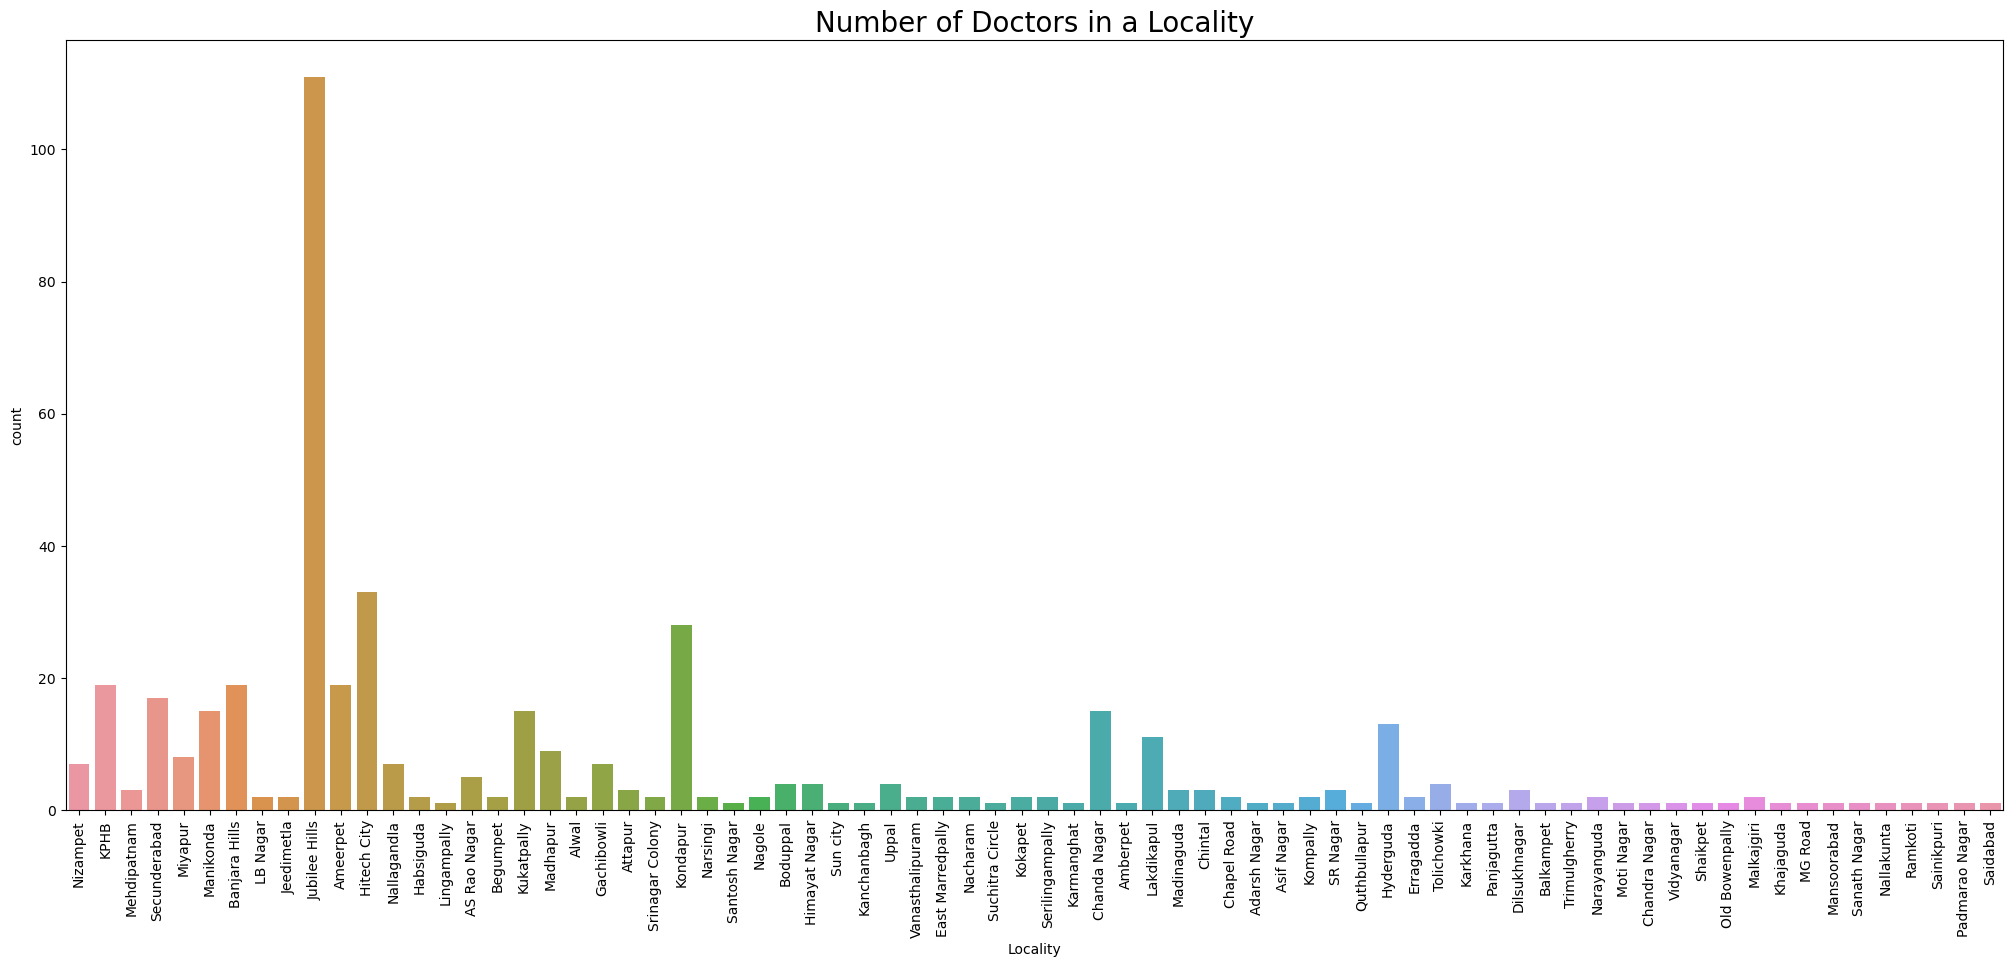

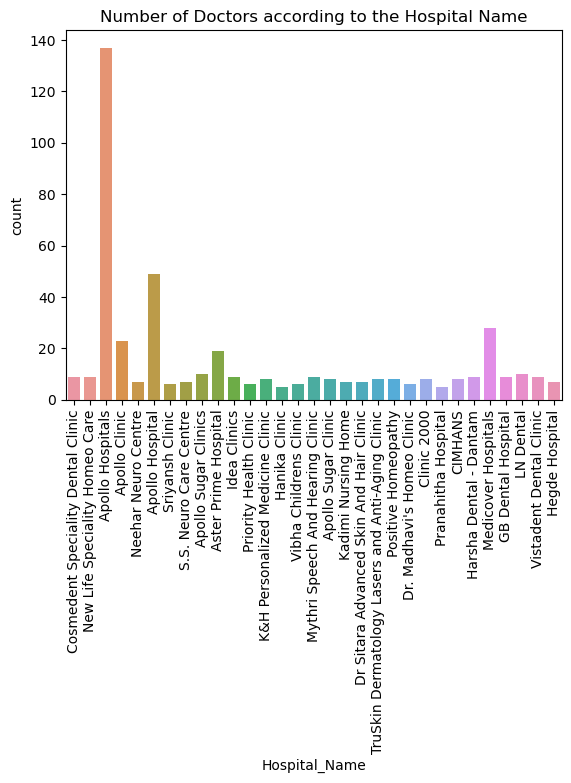

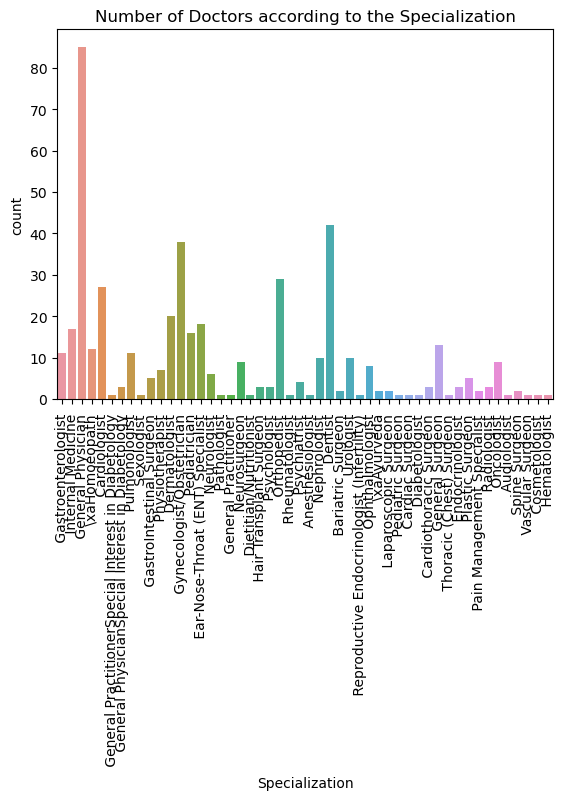

In [21]:
plt.figure(figsize=(25,10))

b=sns.countplot(x=df['Locality'])
plt.setp(b.get_xticklabels(), rotation=90)
plt.title("Number of Doctors in a Locality",fontsize=20)
plt.show()
a=sns.countplot(x=df['Hospital_Name'])
plt.setp(a.get_xticklabels(), rotation=90)
plt.title("Number of Doctors according to the Hospital Name")
plt.show()
c=sns.countplot(x=df['Specialization'])
plt.setp(c.get_xticklabels(), rotation=90)
plt.title("Number of Doctors according to the Specialization")
plt.show()




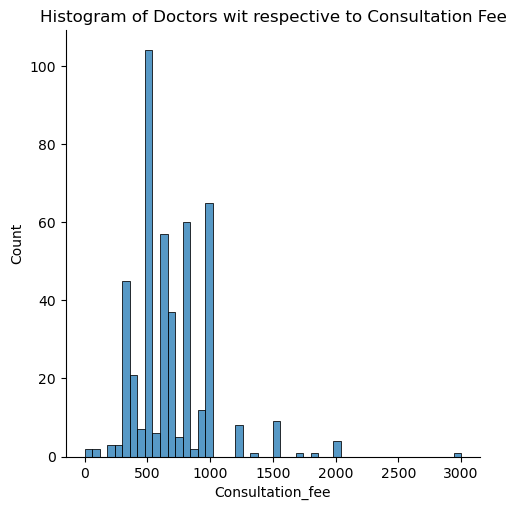

In [22]:
sns.displot(data=df['Consultation_fee'],kind='hist',bins=50) 
plt.title("Histogram of Doctors wit respective to Consultation Fee")
plt.show()

## Bi-variate Analysis & Multivariate Analysis:

#### Bi-variate Analysis: A statistical method that examines the relationship between two variables.

#### Multivariate Analysis: A statistical method that examines the relationship between three or more variables. It provides a deeper understanding of the relationships between variables and can uncover complex patterns and interactions between variables.

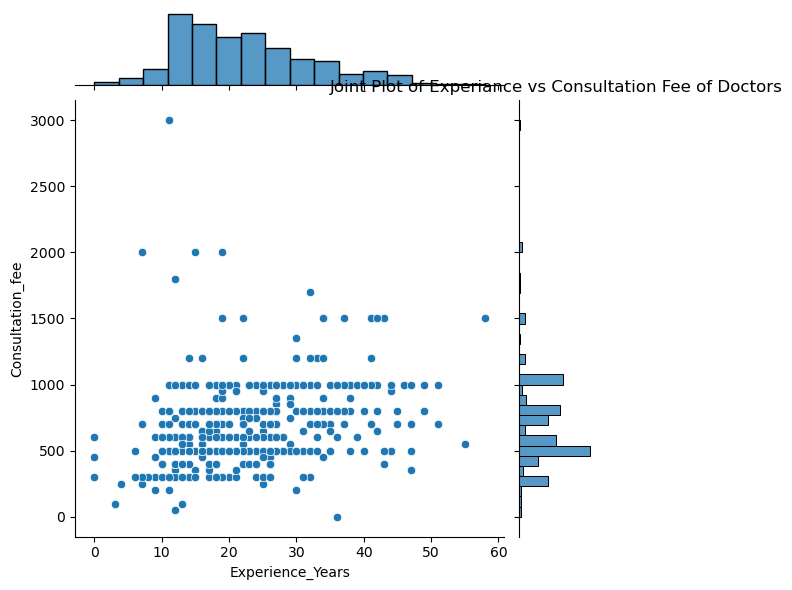

In [23]:
sns.jointplot(data=df, x='Experience_Years', y='Consultation_fee', kind='scatter')
plt.title('Joint Plot of Experiance vs Consultation Fee of Doctors')
plt.show()

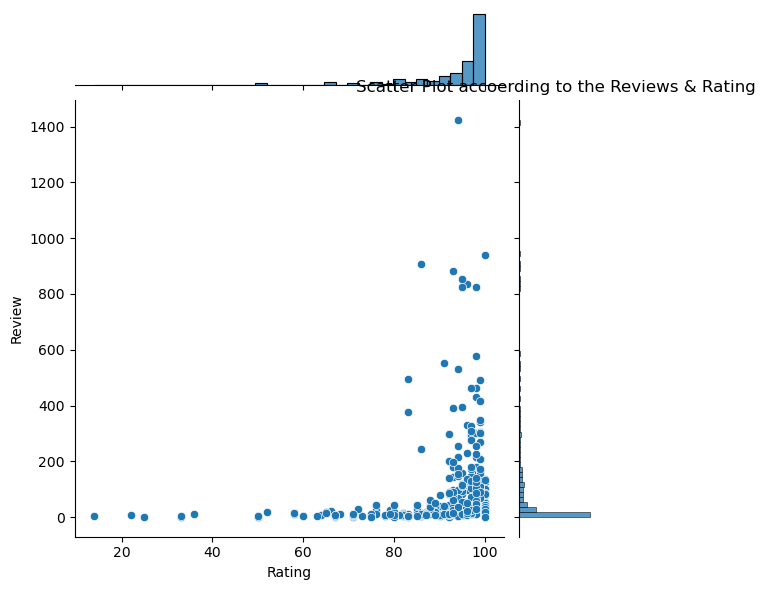

In [24]:
sns.jointplot(data=df, x='Rating', y='Review', kind='scatter')
plt.title("Scatter Plot accoerding to the Reviews & Rating")
plt.show()

In [7]:
top_review=df.nlargest(50,'Review')
top_exp=df.nlargest(50,'Experience_Years')
low_fee=df.nsmallest(50,'Consultation_fee')
high_fee=df.nlargest(50,'Consultation_fee')

In [26]:
top_review

Specialization  \
198                                   Endocrinologist    
369                                           Dentist    
279                  Ear-Nose-Throat (ENT) Specialist    
298                                      Pediatrician    
81                                  General Physician    
1                                   Internal Medicine    
268                                           Dentist    
149                                 Bariatric Surgeon    
301                                     \xaHomoeopath    
322                                     \xaHomoeopath    
272                                      Cardiologist    
364                         Gynecologist/Obstetrician    
71                                  General Physician    
352                                      Pediatrician    
356                  Ear-Nose-Throat (ENT) Specialist    
3                                   General Physician    
45                                         Sexologist    
19                                       Cardiologist    
380                         Gynecologist/Obstetrician    
146                  Ear-Nose-Throat (ENT) Specialist    
445                                           Dentist    
351                                         Urologist    
252                                      Pediatrician    
280                                         Urologist    
286                                     Pulmonologist    
29    General PhysicianSpecial Interest in Diabetol...   
358                                           Dentist    
387                                           Dentist    
243                                       Orthopedist    
299                         Gynecologist/Obstetrician    
220                                         Urologist    
87                                  General Physician    
318                                       Radiologist    
376                                     Pulmonologist    
383                                           Dentist    
329                                     Dermatologist    
136                                      Psychologist    
277                                      Pediatrician    
158        Reproductive Endocrinologist (Infertility)    
8                                   Internal Medicine    
9                                       \xaHomoeopath    
0                                  Gastroenterologist    
66                                  General Physician    
276                         Gynecologist/Obstetrician    
414                         Gynecologist/Obstetrician    
2                                   General Physician    
401                                           Dentist    
4                                   Internal Medicine    
321                                       Orthopedist    
436                                           Dentist    

                               Doctor_Name  Experience_Years  \
198                         Dr. Ravi Kumar                19   
369                    Dr. Harsha Nagineni                11   
279                        Dr. Venu Kumari                18   
298                      Dr. Vandana Hegde                20   
81                   Dr. Prashant K Vaidya                14   
1                     Dr. Kembavi Srinivas                37   
268                          Dr. Yugandhar                21   
149                       Dr. Ananda Kumar                30   
301                        Dr. Satish Erra                14   
322                       Dr. Madhavi Pudi                16   
272                    Dr. Siddartha Reddy                15   
364                         Dr. Rajeshwari                20   
71                     Dr. N.V. Ramana Rao                26   
352                       Dr. Bharat Reddy                25   
356                           Dr. Raju C H                15   
3                   Dr. M. S. Sushma Susik               

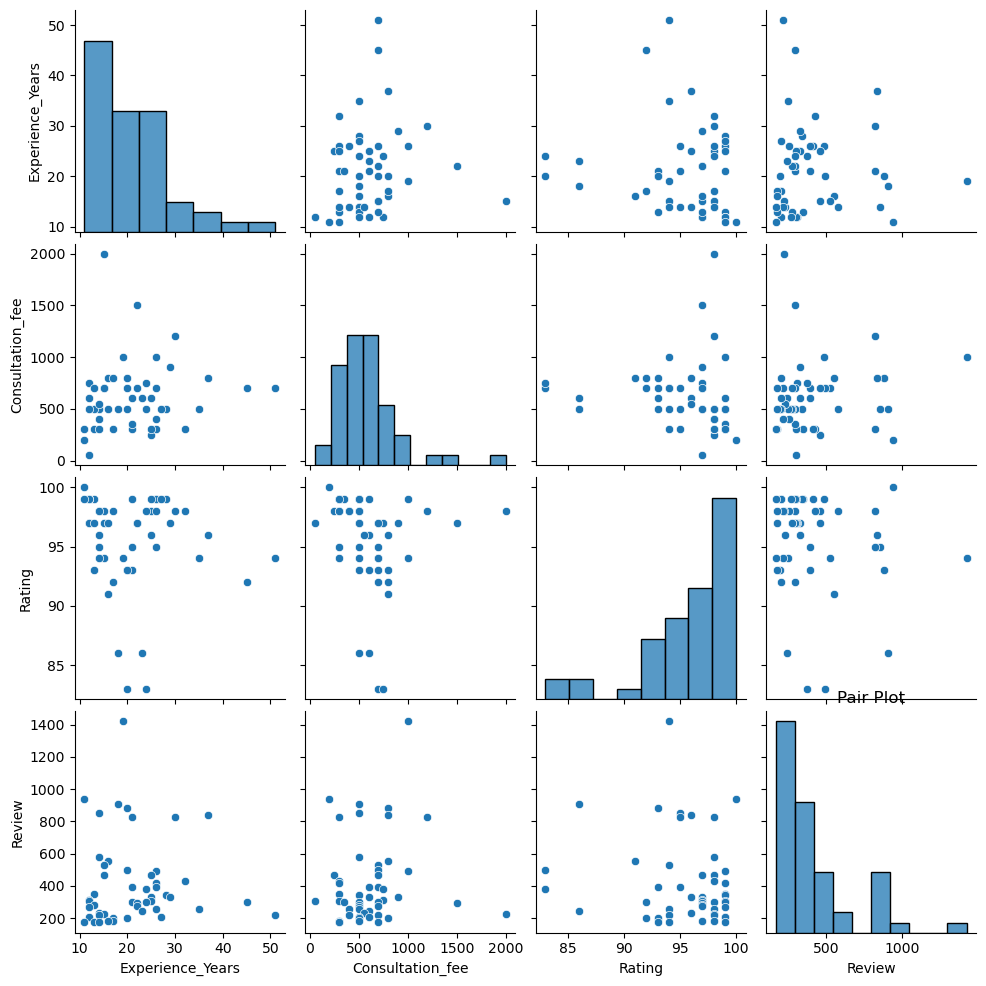

In [13]:
sns.pairplot(top_review)
plt.title("Pair Plot")
plt.show()

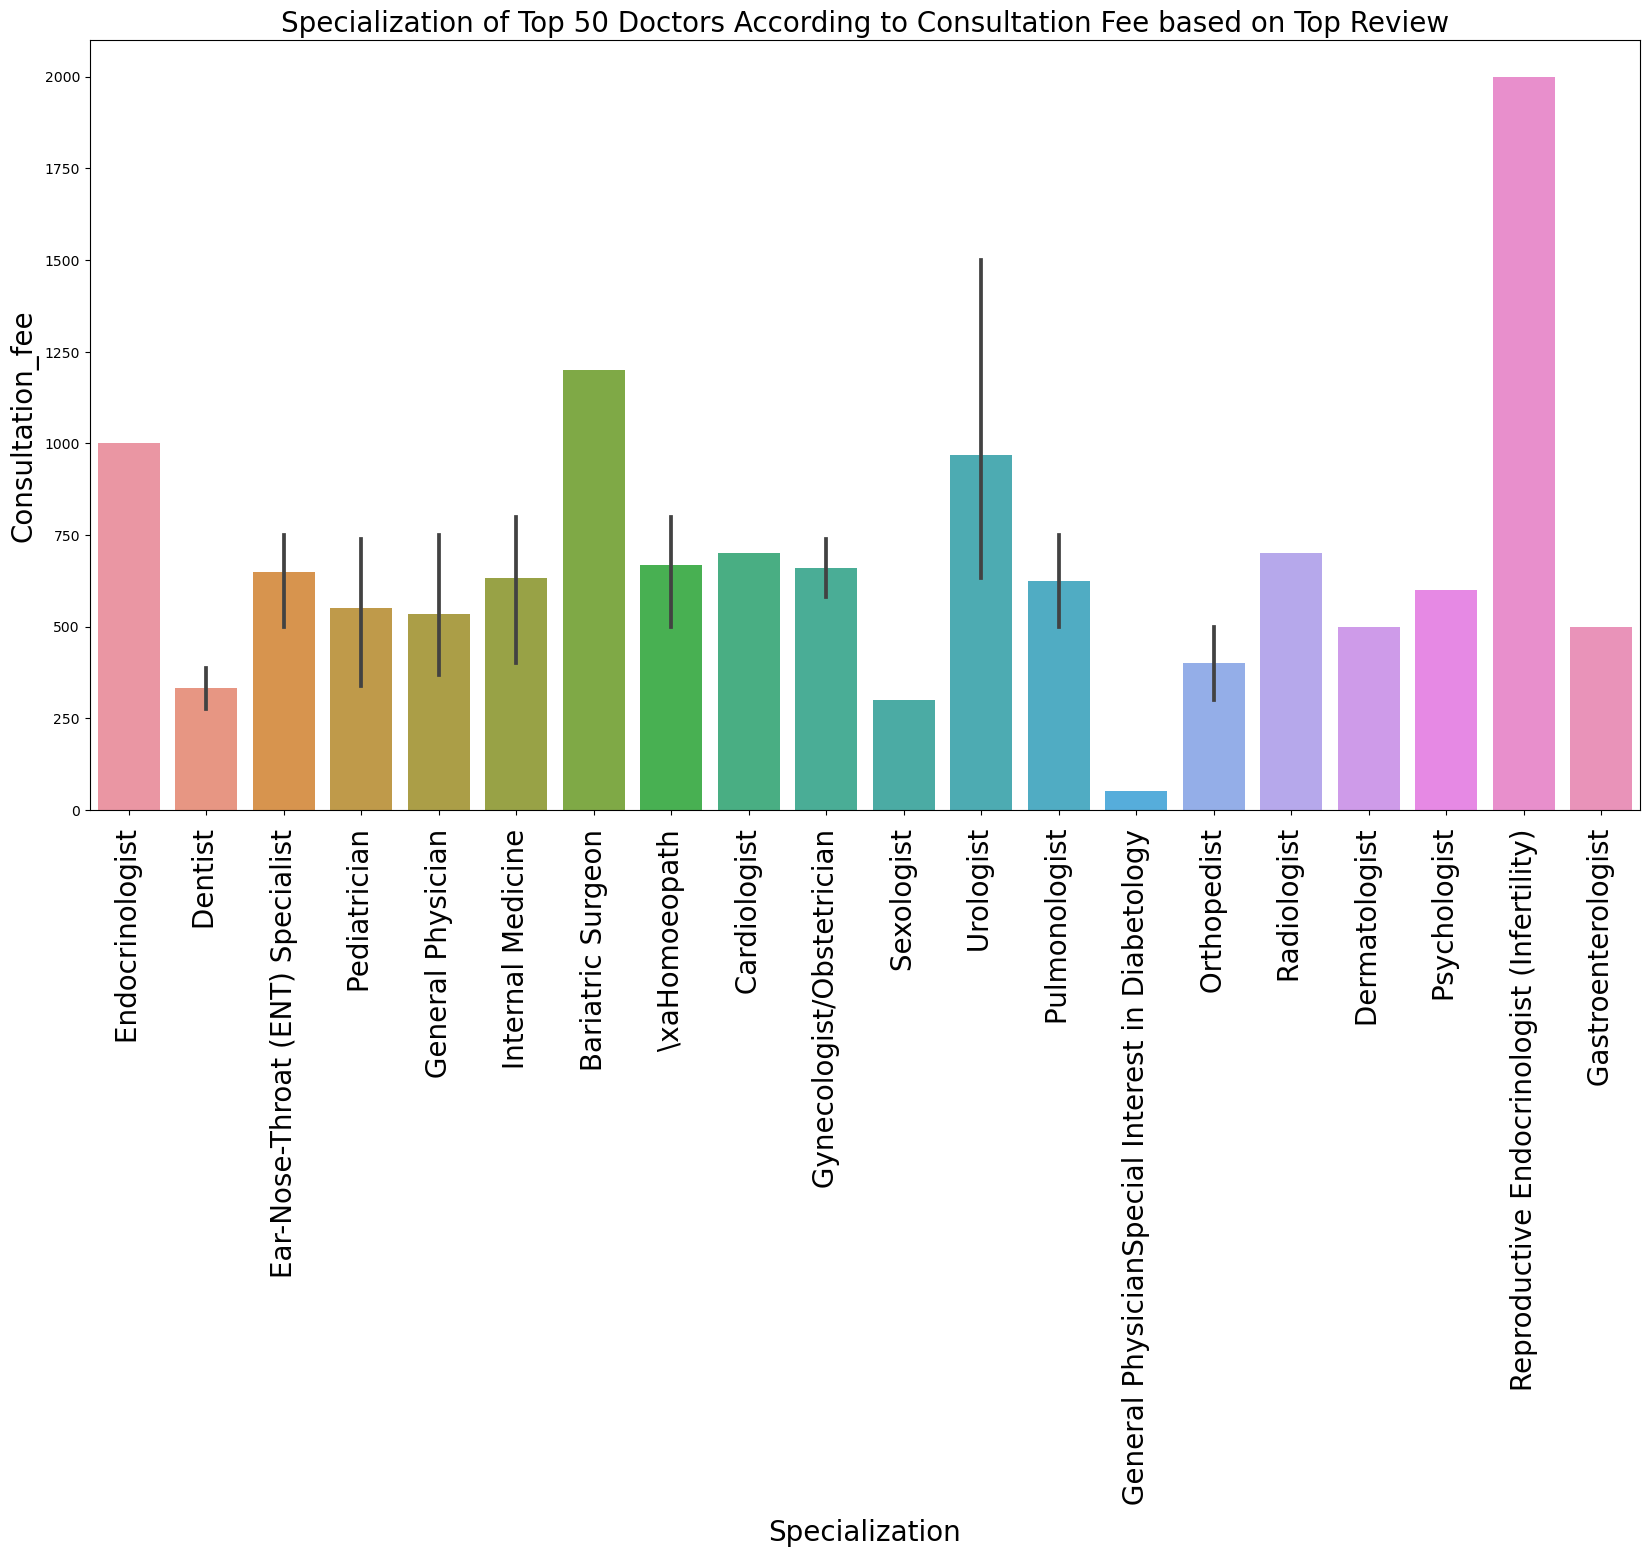

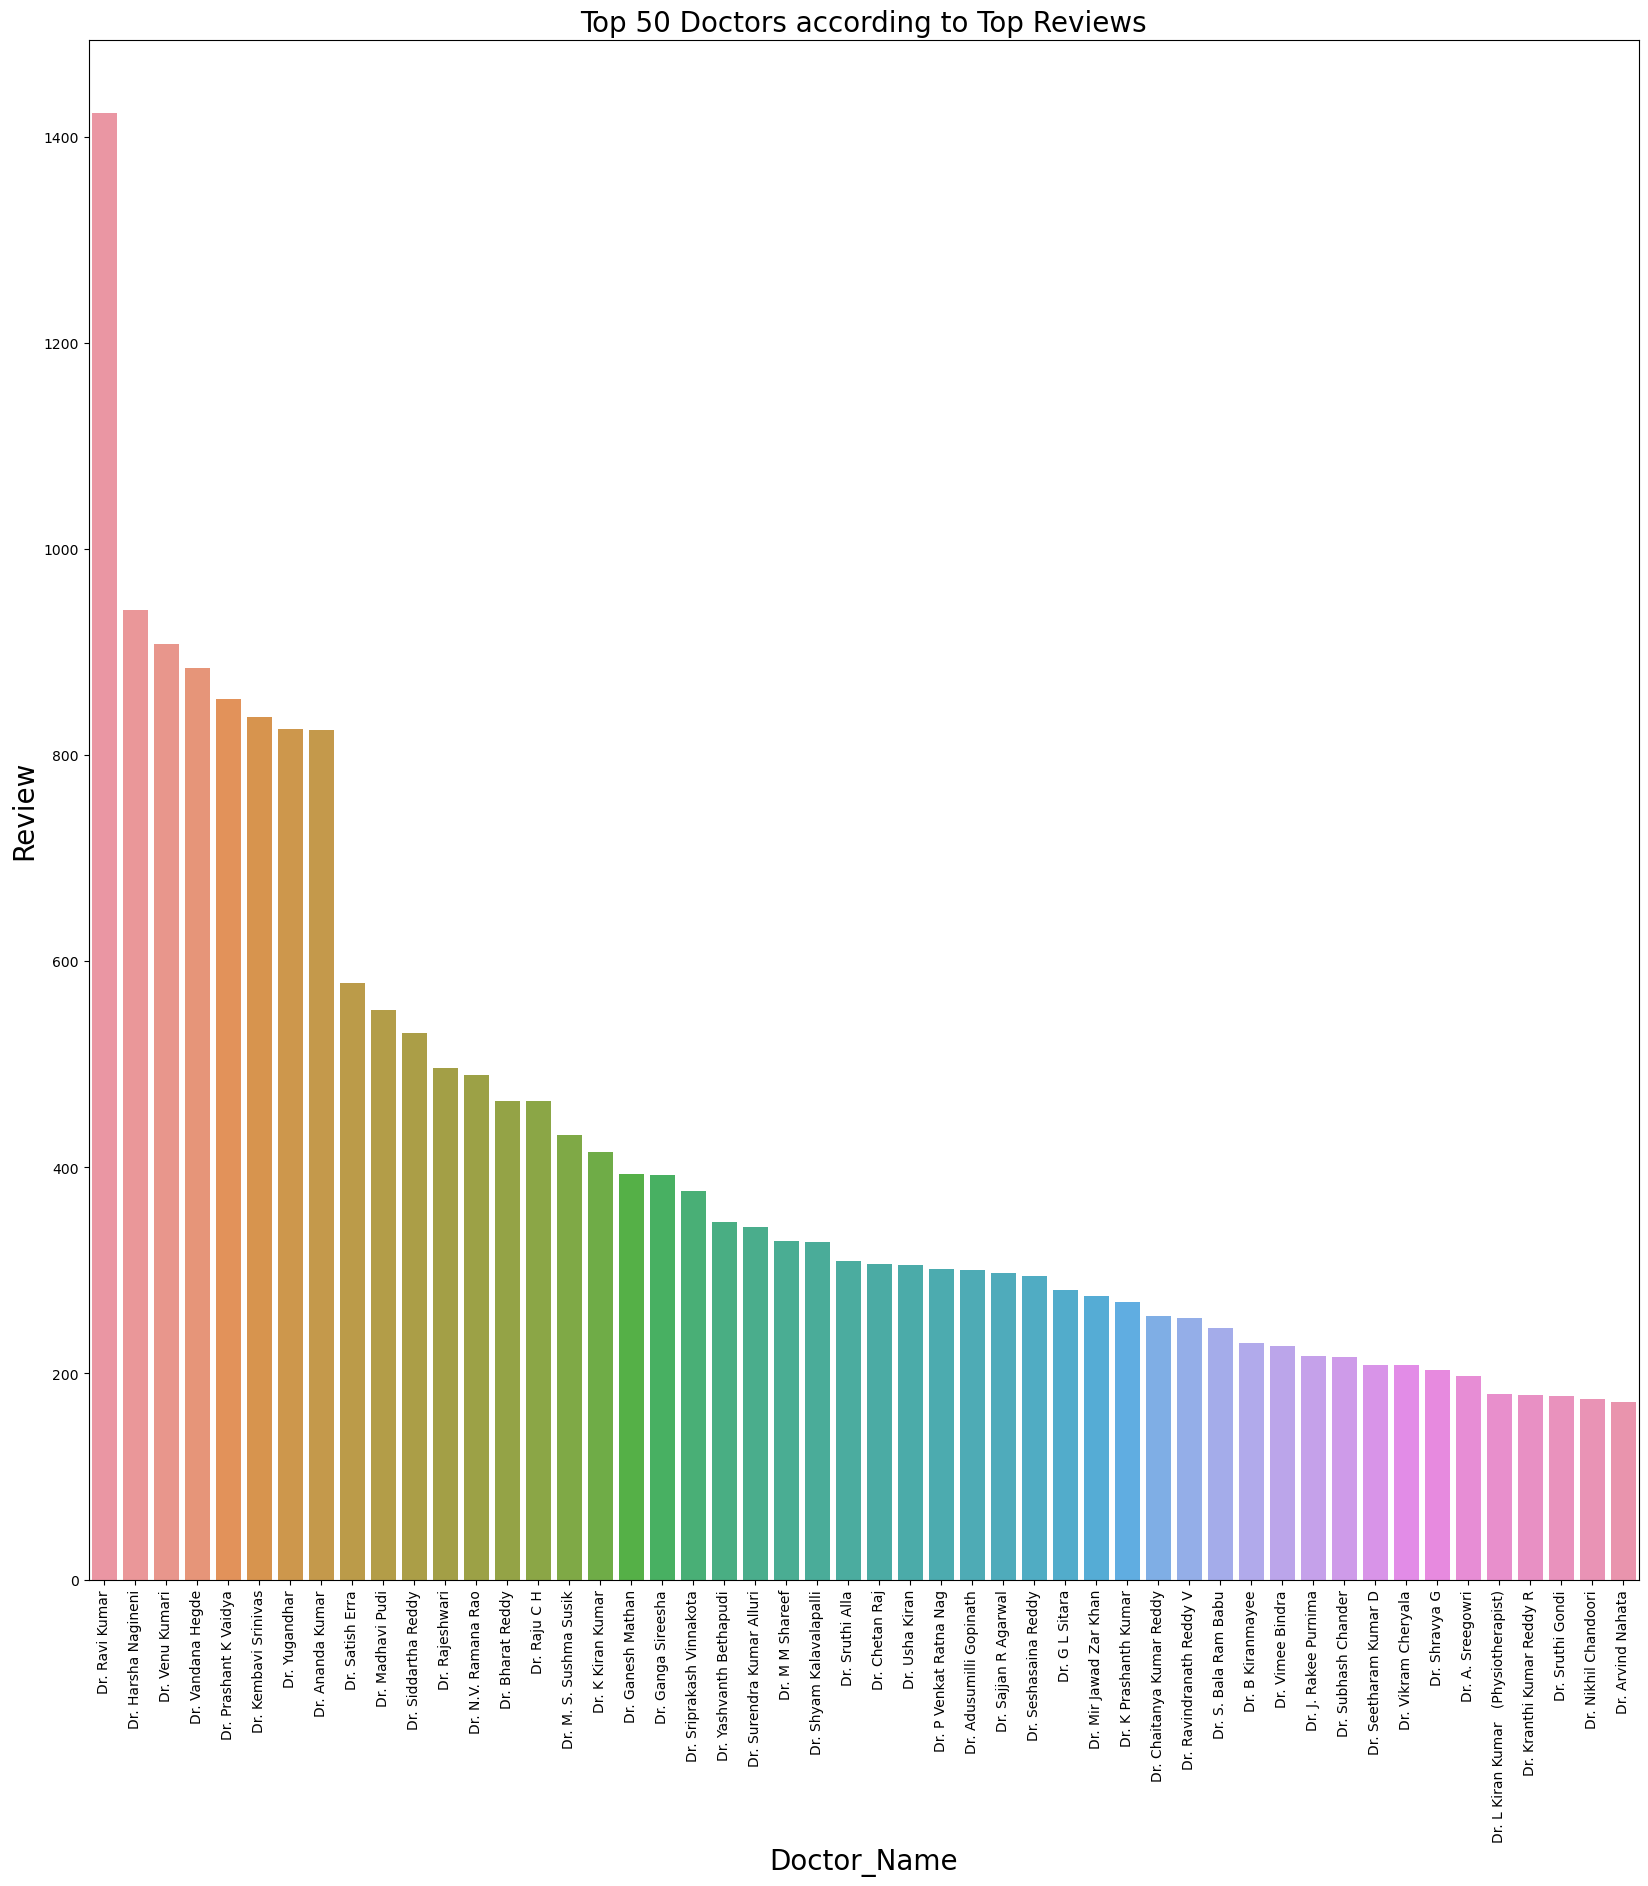

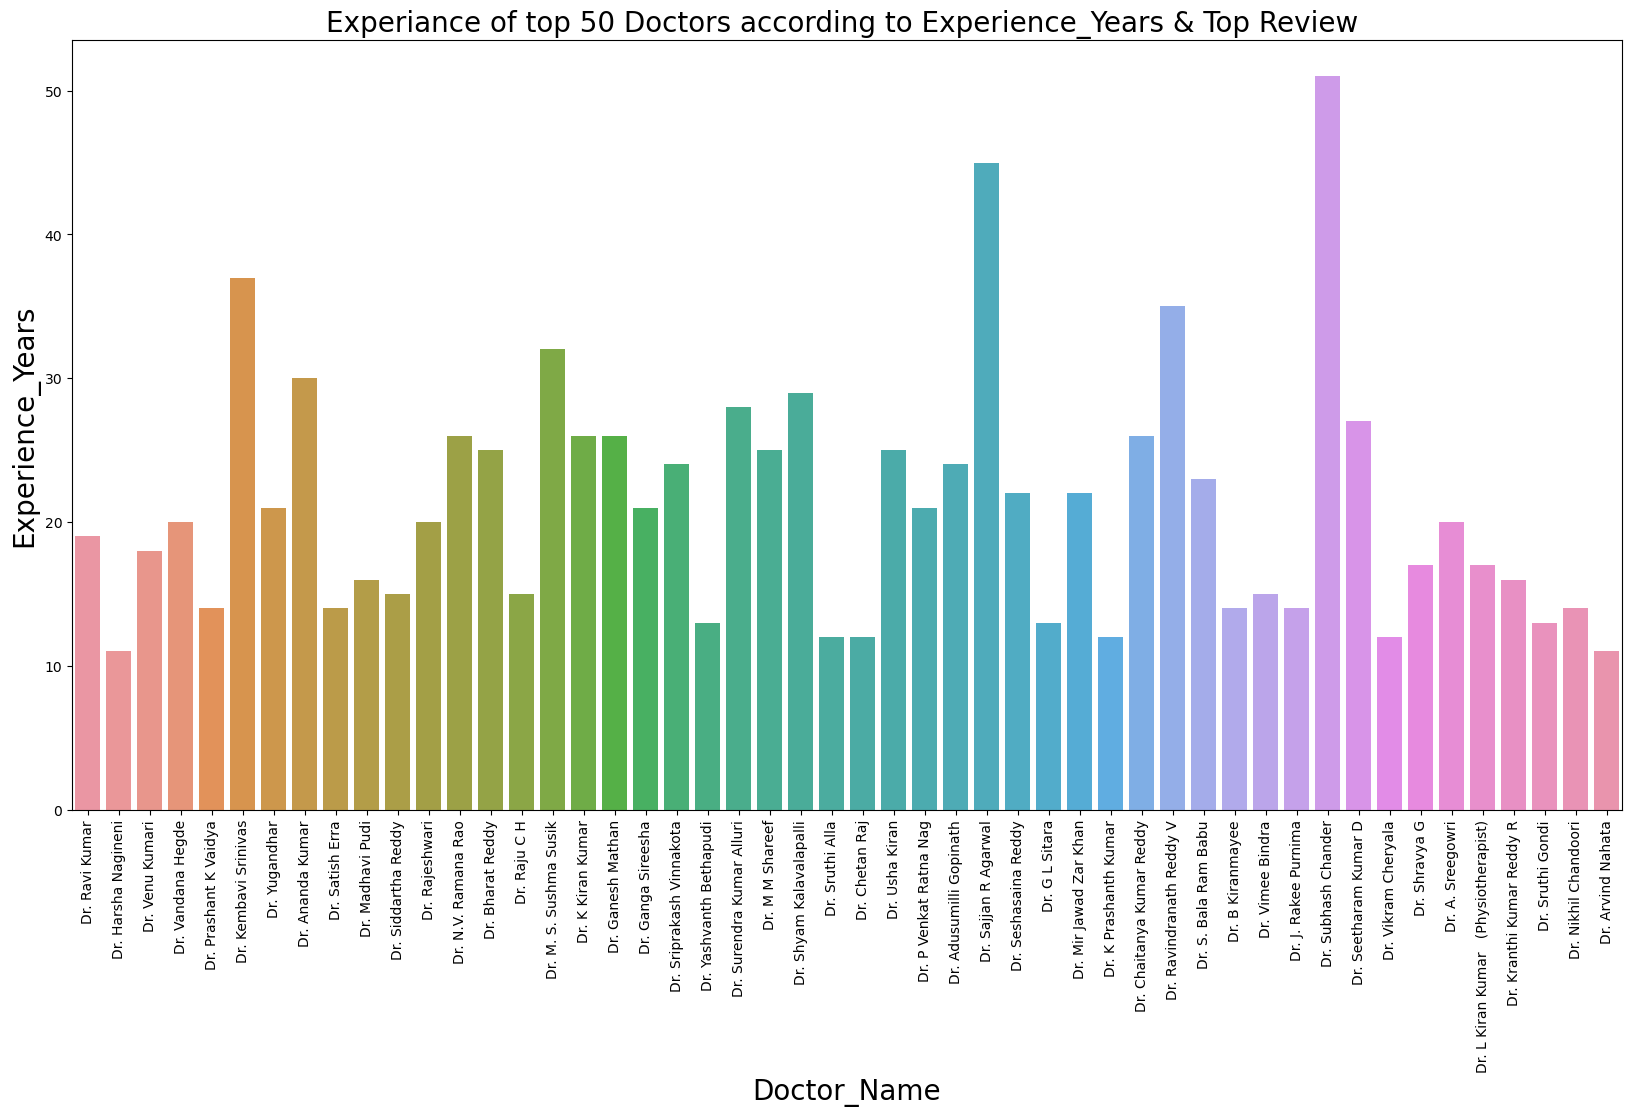

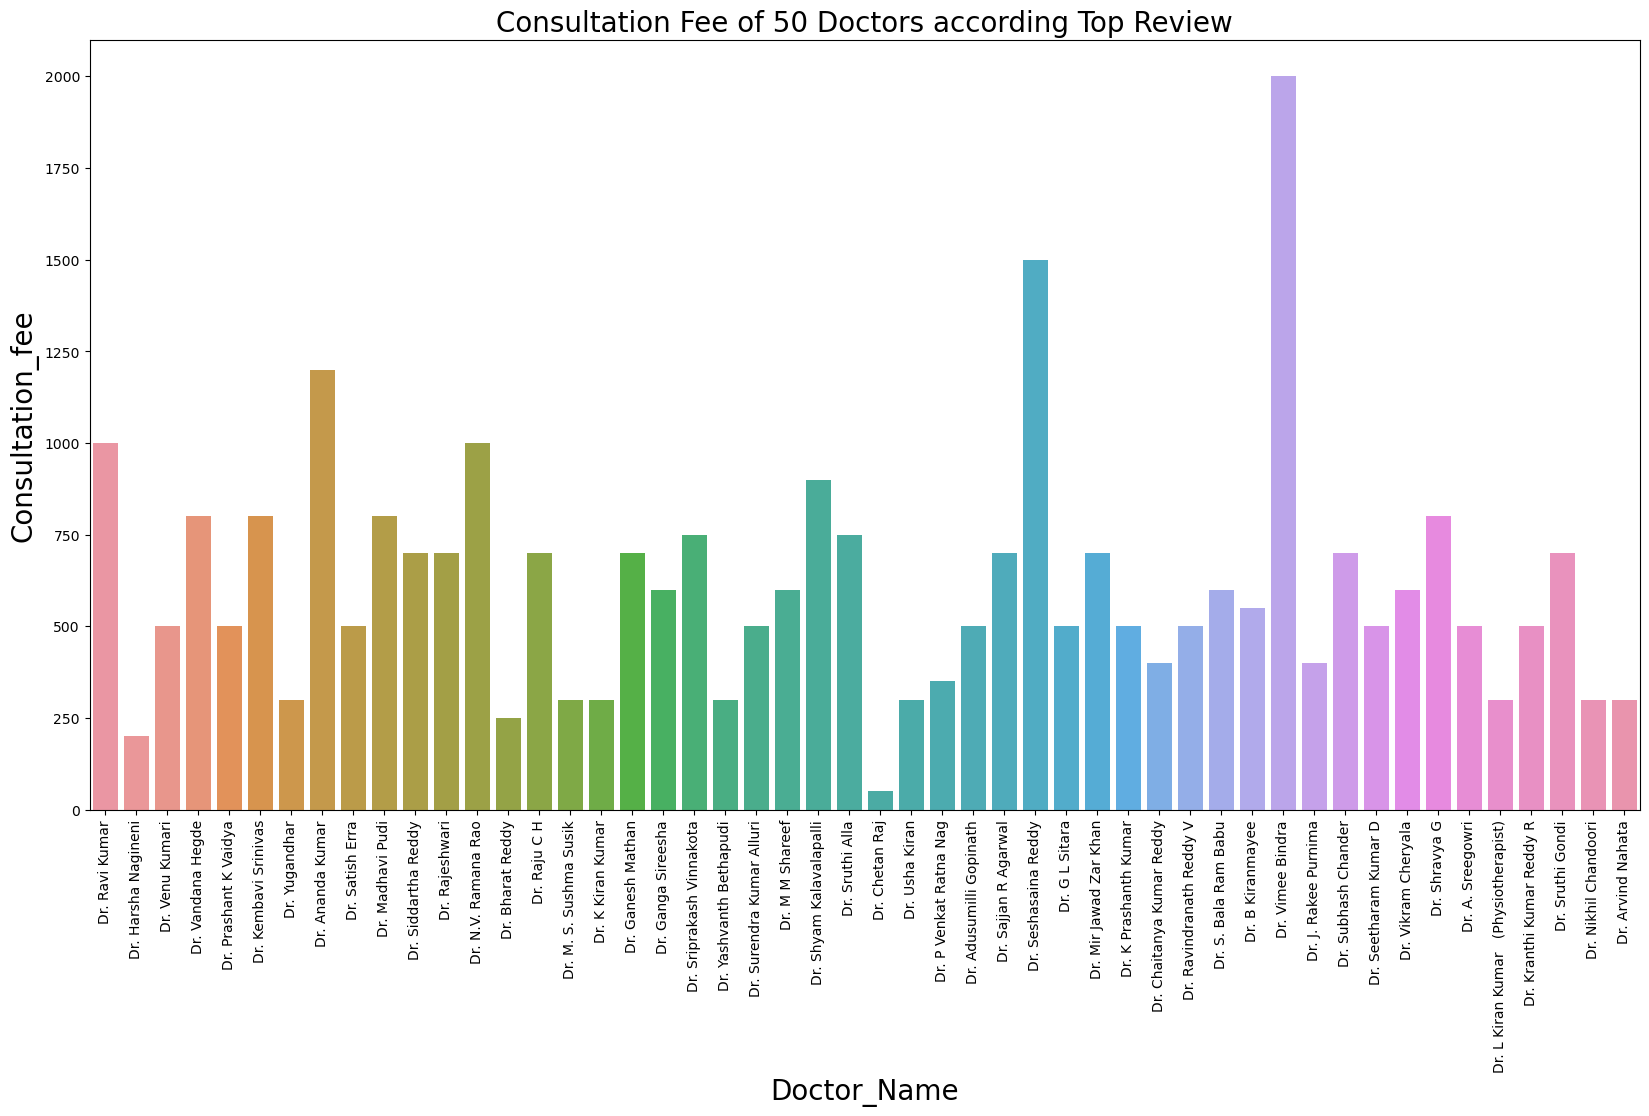

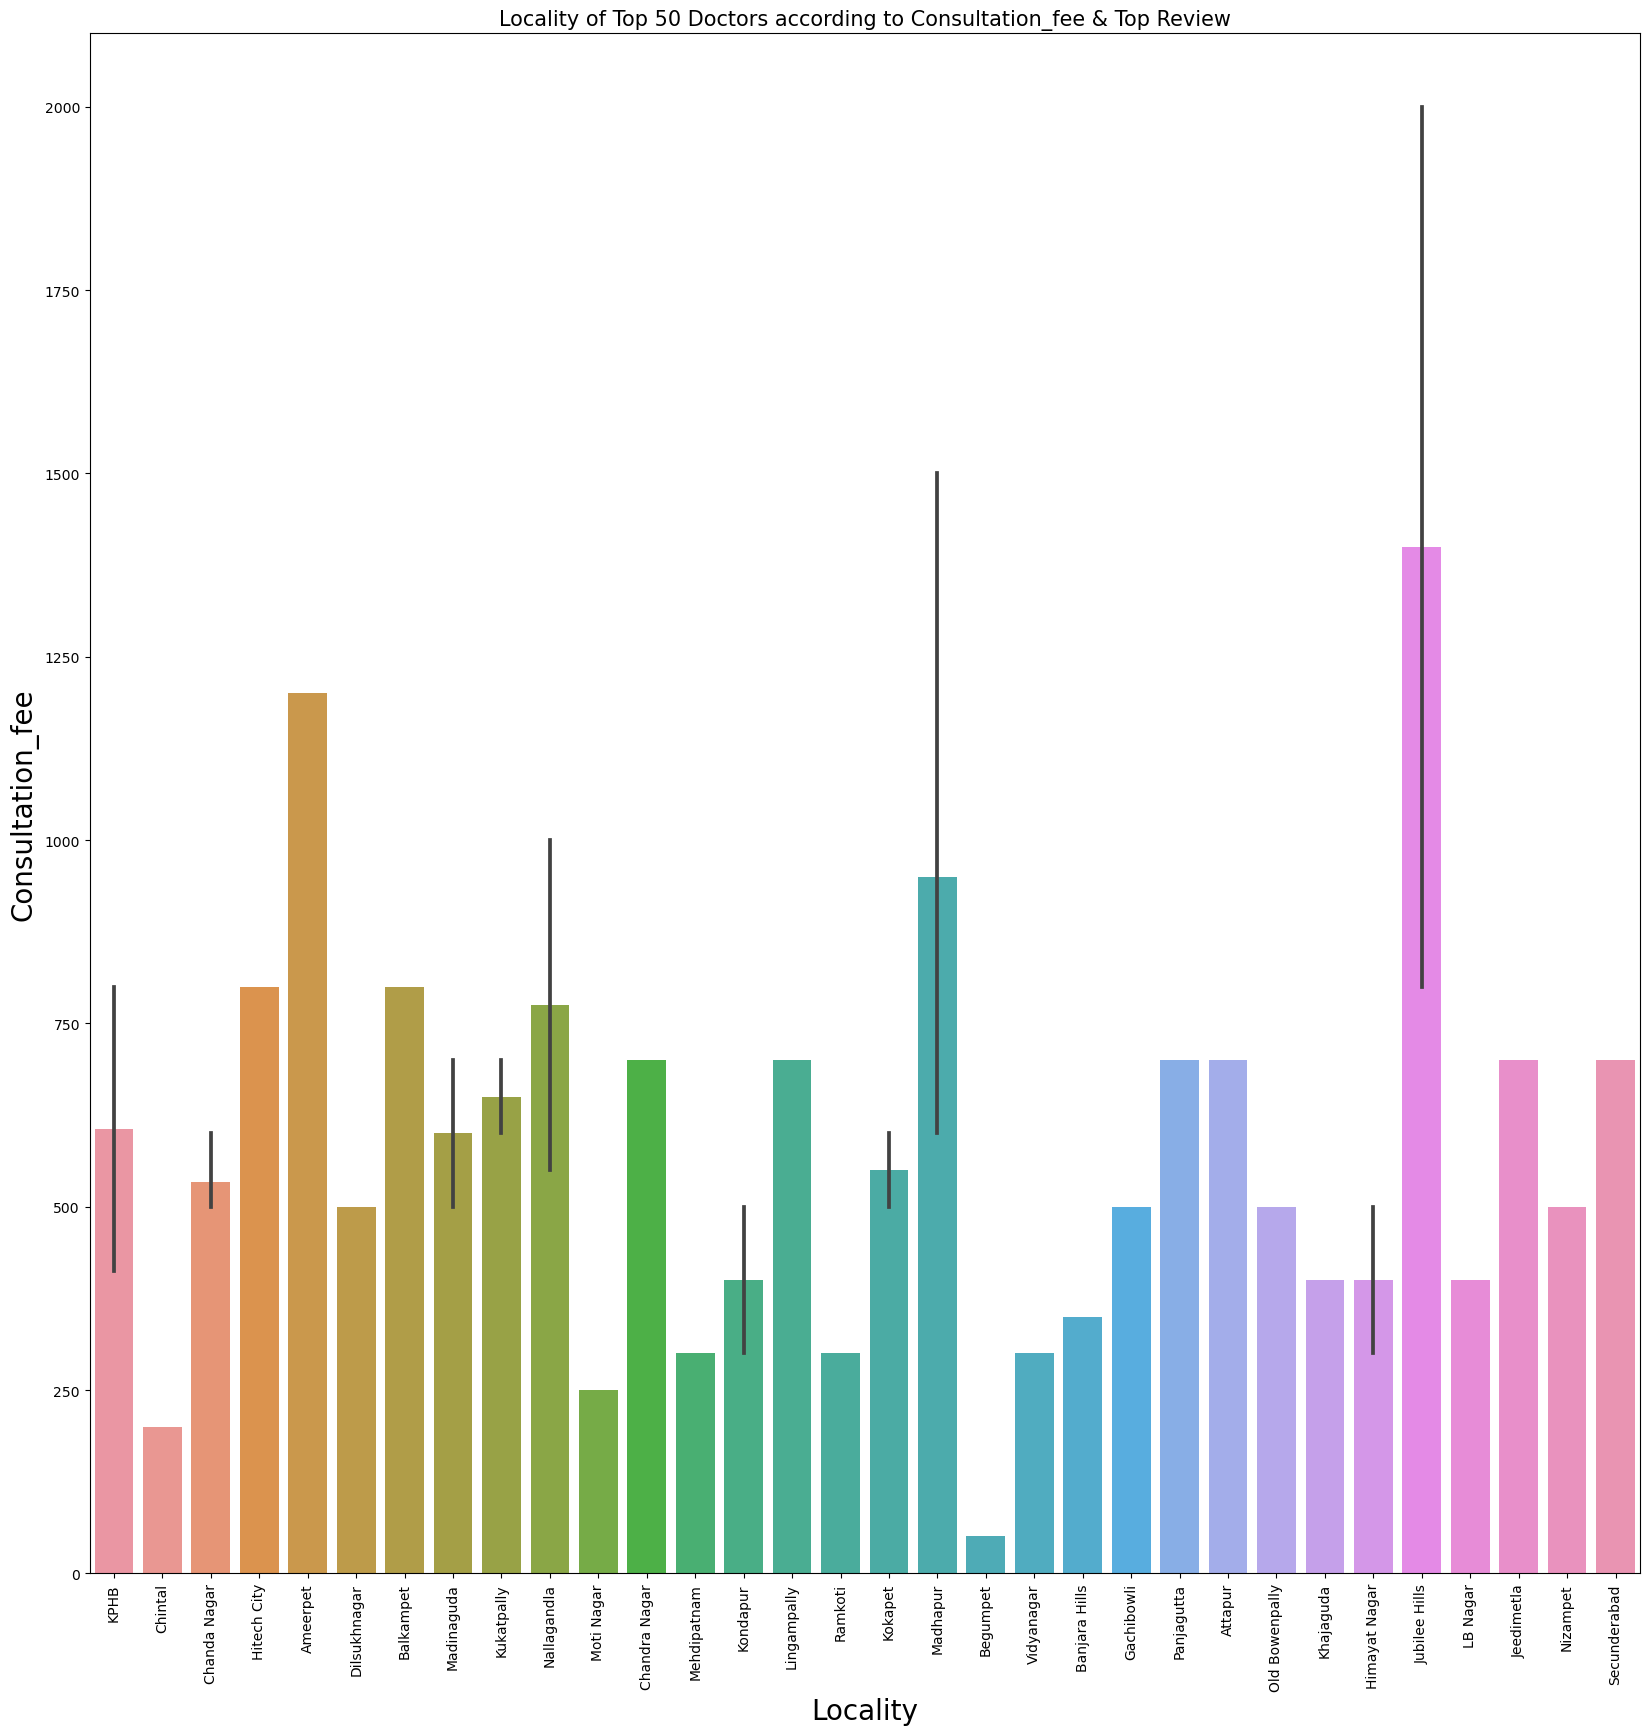

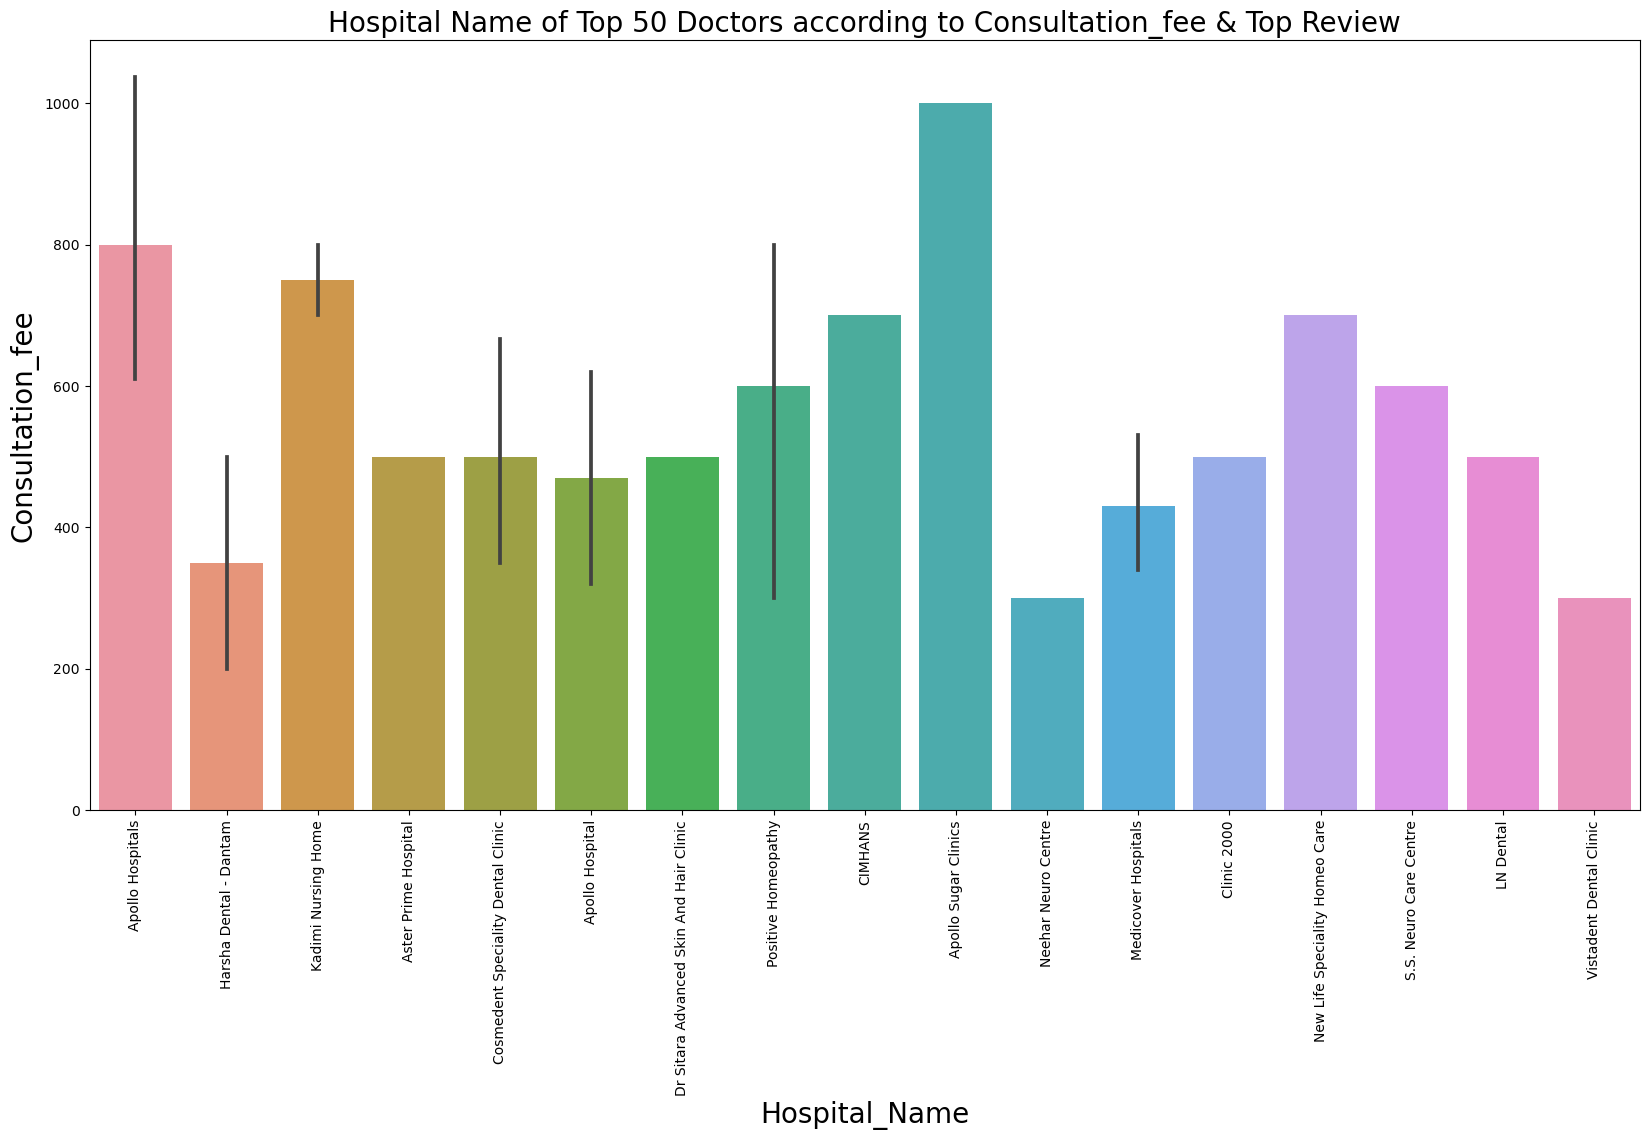

In [27]:


plt.figure(figsize=(20,10))
d=sns.barplot(x="Specialization",y="Consultation_fee",data=top_review)
plt.xlabel("Specialization",fontsize=20)
plt.ylabel("Consultation_fee",fontsize=20)
plt.title("Specialization of Top 50 Doctors According to Consultation Fee based on Top Review",fontsize=20)
plt.setp(d.get_xticklabels(), rotation=90,fontsize=20)
plt.show()

plt.figure(figsize=(20,20)) 
a=sns.barplot(x="Doctor_Name",y="Review",data=top_review)
plt.xlabel("Doctor_Name",fontsize=20)
plt.ylabel("Review",fontsize=20)
plt.title("Top 50 Doctors according to Top Reviews",fontsize=20)
plt.setp(a.get_xticklabels(), rotation=90)



plt.figure(figsize=(20,10))
b=sns.barplot(x="Doctor_Name",y="Experience_Years",data=top_review)
plt.xlabel("Doctor_Name",fontsize=20)
plt.ylabel("Experience_Years",fontsize=20)
plt.title("Experiance of top 50 Doctors according to Experience_Years & Top Review ",fontsize=20)
plt.setp(b.get_xticklabels(), rotation=90)

plt.figure(figsize=(20,10))
c=sns.barplot(x="Doctor_Name",y="Consultation_fee",data=top_review)
plt.xlabel("Doctor_Name",fontsize=20)
plt.ylabel("Consultation_fee",fontsize=20)
plt.title("Consultation Fee of 50 Doctors according Top Review",fontsize=20)
plt.setp(c.get_xticklabels(), rotation=90)
plt.show()

plt.figure(figsize=(20,20))
d=sns.barplot(x="Locality",y="Consultation_fee",data=top_review)
plt.xlabel("Locality",fontsize=20)
plt.ylabel("Consultation_fee",fontsize=20)
plt.title("Locality of Top 50 Doctors according to Consultation_fee & Top Review",fontsize=15)
plt.setp(d.get_xticklabels(), rotation=90)
plt.show()

plt.figure(figsize=(20,10))
d=sns.barplot(x="Hospital_Name",y="Consultation_fee",data=top_review)
plt.xlabel("Hospital_Name",fontsize=20)
plt.ylabel("Consultation_fee",fontsize=20)
plt.title("Hospital Name of Top 50 Doctors according to Consultation_fee & Top Review",fontsize=20)
plt.setp(d.get_xticklabels(), rotation=90)
plt.show()




<Figure size 200000x5000 with 0 Axes>

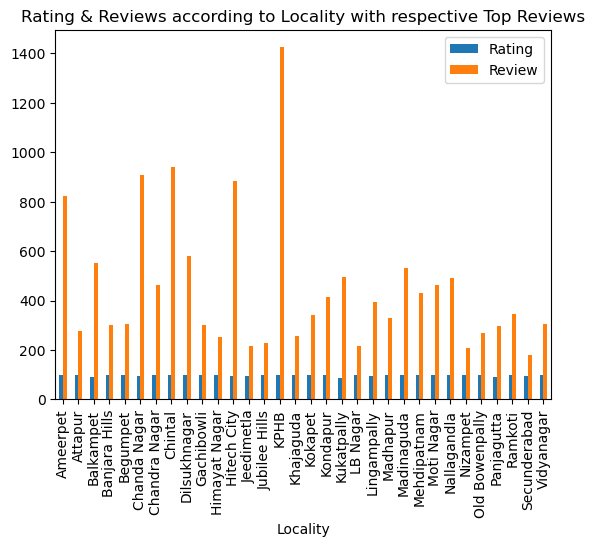

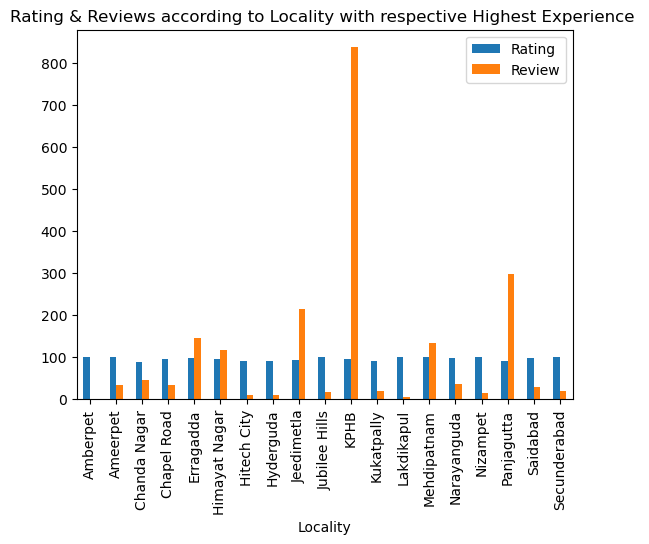

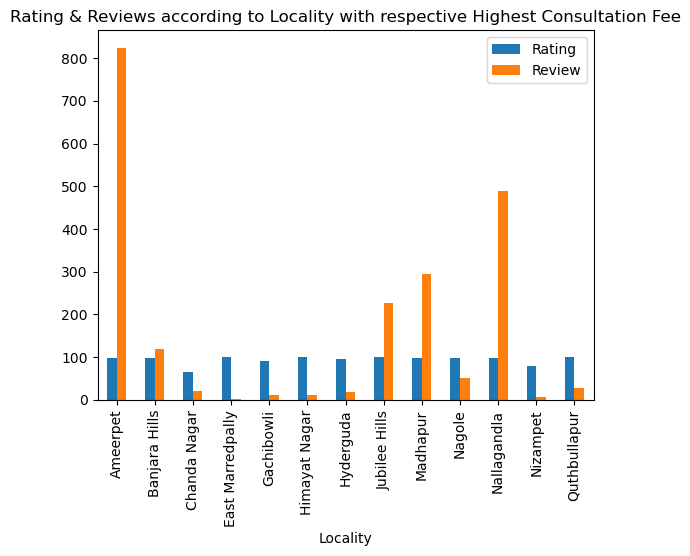

In [26]:
plt.figure(figsize=(2000,50))
top_review.groupby(['Locality'])[['Rating','Review']].max().plot(kind='bar')
plt.title("Rating & Reviews according to Locality with respective Top Reviews")
plt.show()
top_exp.groupby(['Locality'])[['Rating','Review']].max().plot(kind='bar')
plt.title("Rating & Reviews according to Locality with respective Highest Experience ")
plt.show()
high_fee.groupby(['Locality'])[['Rating','Review']].max().plot(kind='bar')
plt.title("Rating & Reviews according to Locality with respective Highest Consultation Fee")
plt.show()


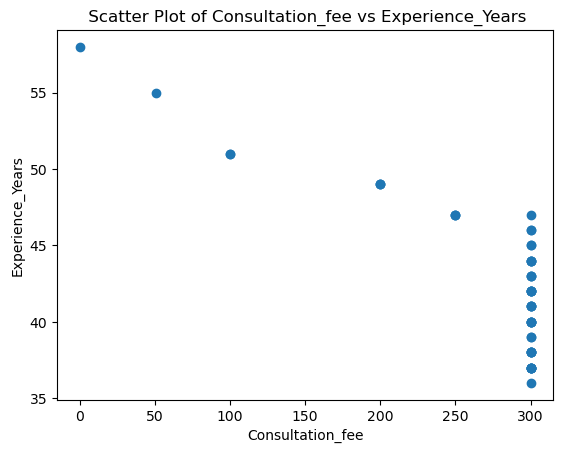

In [29]:
plt.scatter(low_fee['Consultation_fee'],top_exp["Experience_Years"]) 
plt.xlabel('Consultation_fee')
plt.ylabel('Experience_Years')
plt.title(" Scatter Plot of Consultation_fee vs Experience_Years")
plt.show()

<Figure size 5000x6000 with 0 Axes>

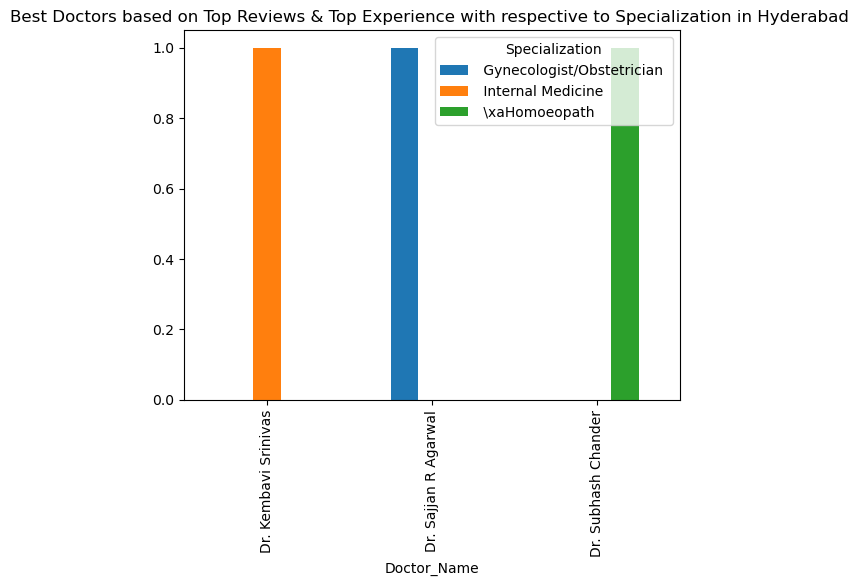

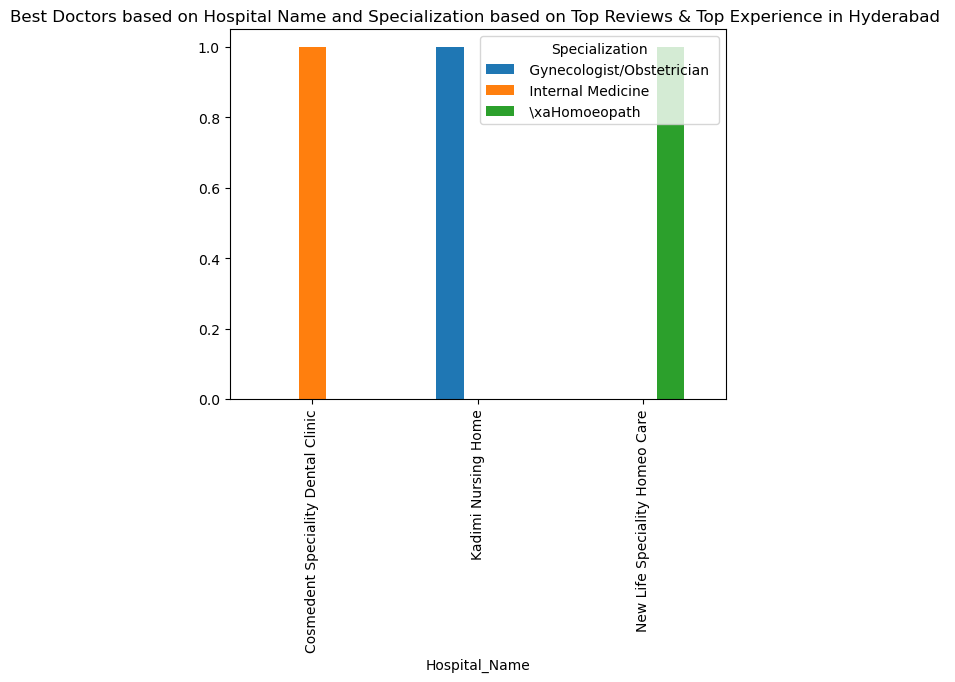

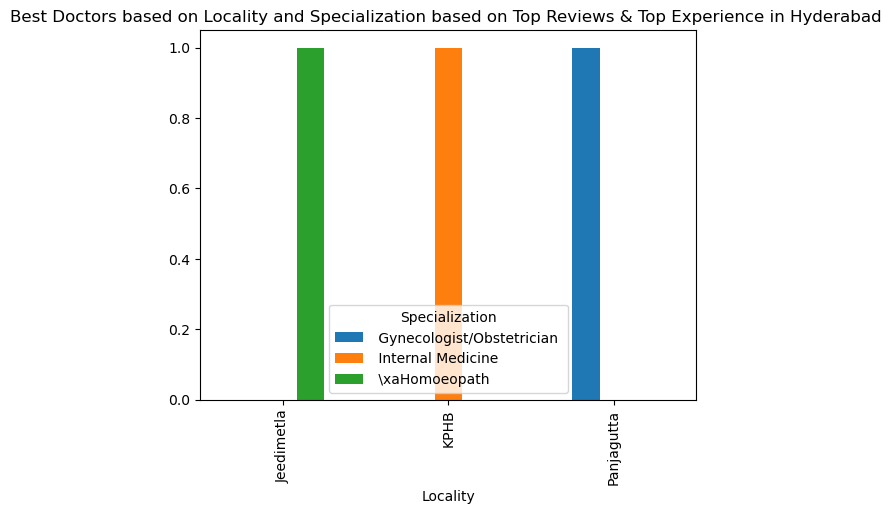

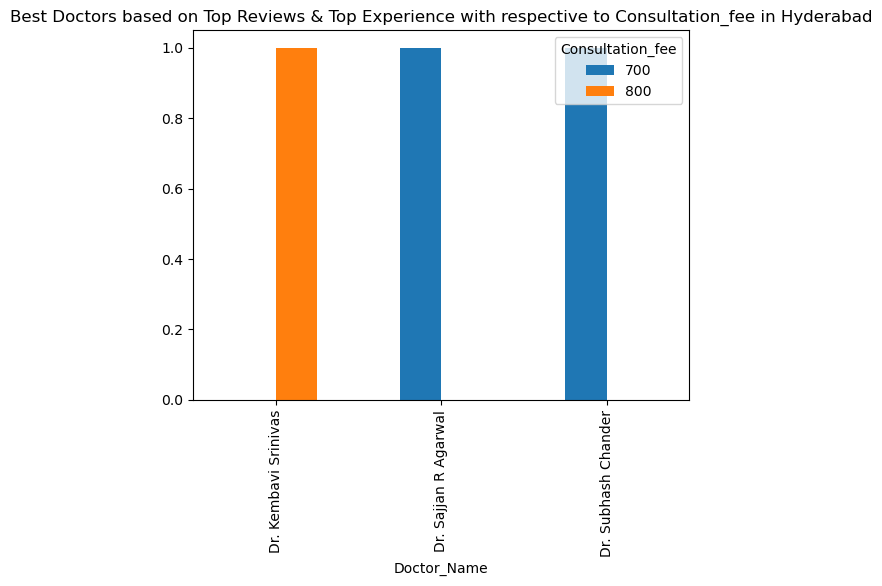

In [9]:


plt.figure(figsize=(50,60))
a=pd.crosstab(top_review['Doctor_Name'],top_exp['Specialization']).plot(kind='bar')
plt.title("Best Doctors based on Top Reviews & Top Experience with respective to Specialization in Hyderabad ")
plt.setp(a.get_xticklabels(), rotation=90)
plt.show()

pd.crosstab(top_review['Hospital_Name'],top_exp['Specialization']).plot(kind='bar')
plt.title("Best Doctors based on Hospital Name and Specialization based on Top Reviews & Top Experience in Hyderabad ")
plt.show()

pd.crosstab(top_review['Locality'],top_exp['Specialization']).plot(kind='bar')
plt.title("Best Doctors based on Locality and Specialization based on Top Reviews & Top Experience in Hyderabad ")
plt.show()

pd.crosstab(top_review['Doctor_Name'],top_exp['Consultation_fee']).plot(kind='bar')
plt.title("Best Doctors based on Top Reviews & Top Experience with respective to Consultation_fee in Hyderabad")
plt.show()



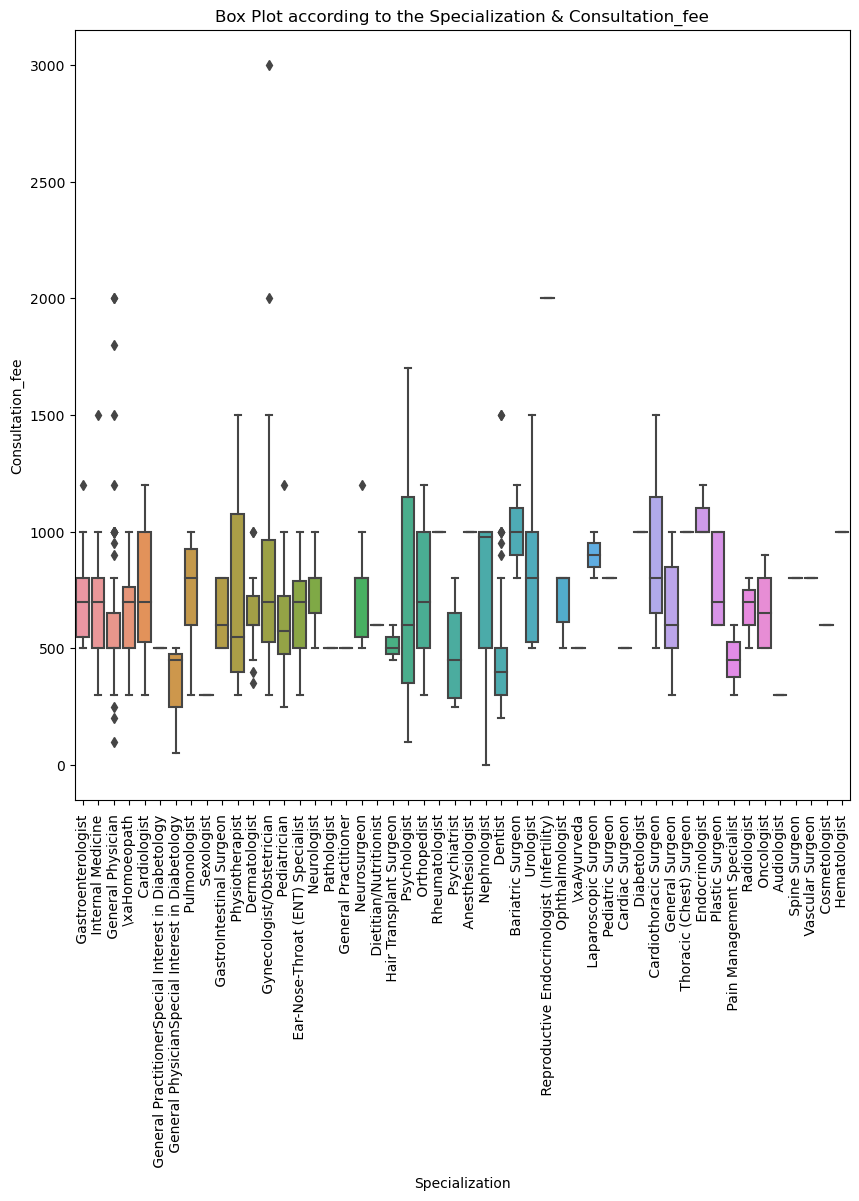

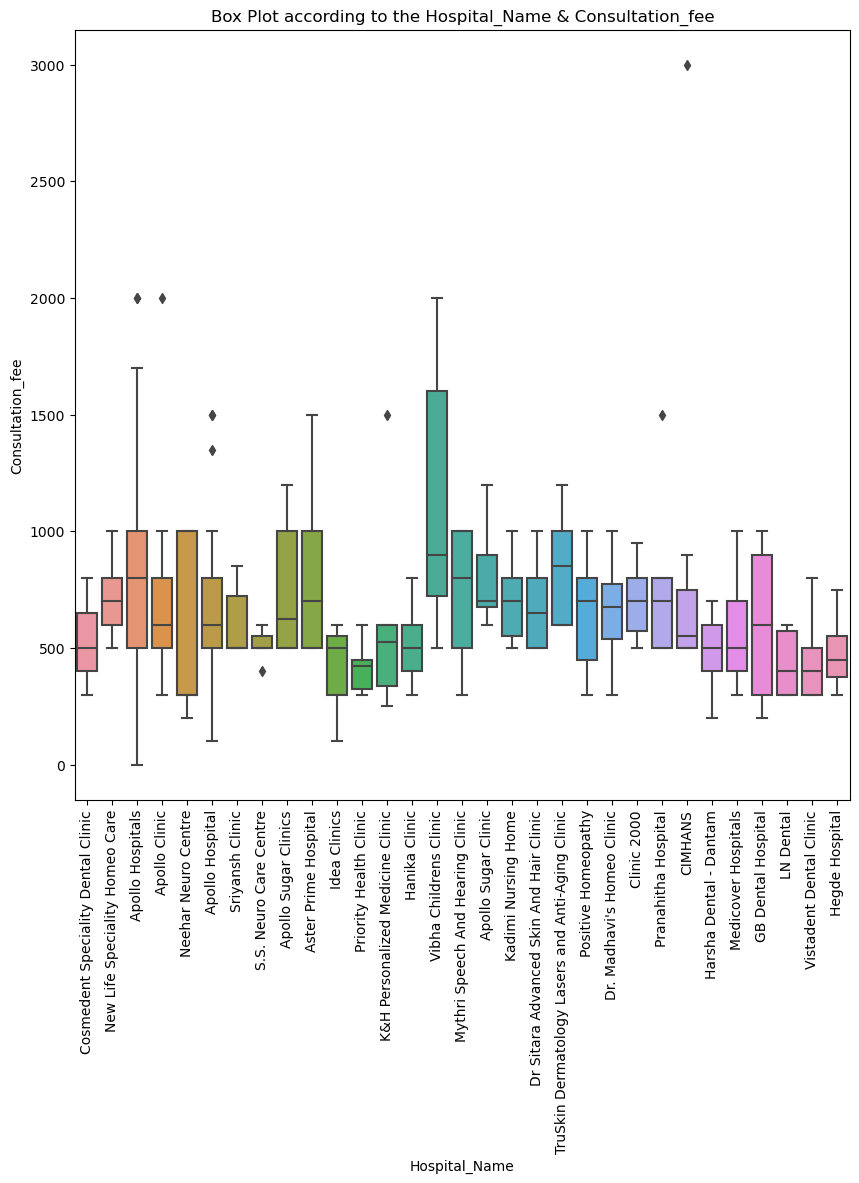

In [31]:
plt.figure(figsize=(10,10))
a=sns.boxplot(data =df,x='Specialization',y='Consultation_fee')
plt.title("Box Plot according to the Specialization & Consultation_fee")
plt.setp(a.get_xticklabels(), rotation=90)
plt.show()

plt.figure(figsize=(10,10))
a=sns.boxplot(data =df,x='Hospital_Name',y='Consultation_fee')
plt.title("Box Plot according to the Hospital_Name & Consultation_fee")
plt.setp(a.get_xticklabels(), rotation=90)
plt.show()

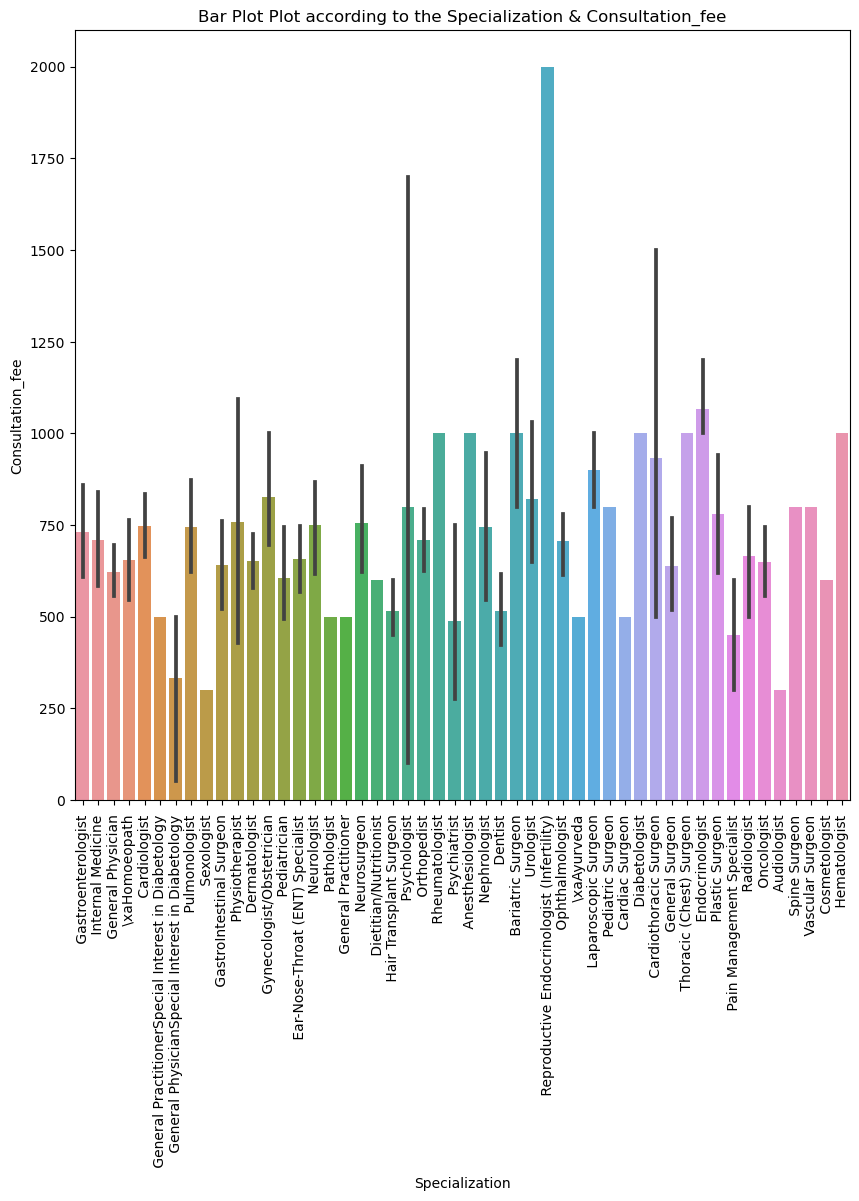

In [32]:
plt.figure(figsize=(10,10))
a=sns.barplot(data =df,x='Specialization',y='Consultation_fee')
plt.title("Bar Plot Plot according to the Specialization & Consultation_fee")
plt.setp(a.get_xticklabels(), rotation=90)
plt.show()

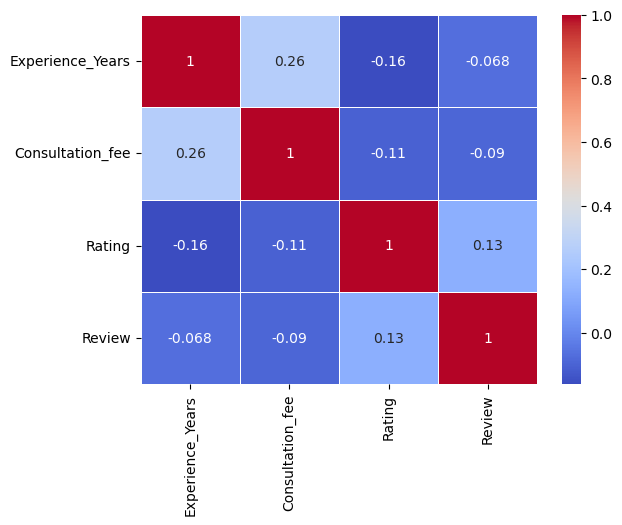

In [6]:
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm',linewidth=0.5,linecolor='white')
plt.show()

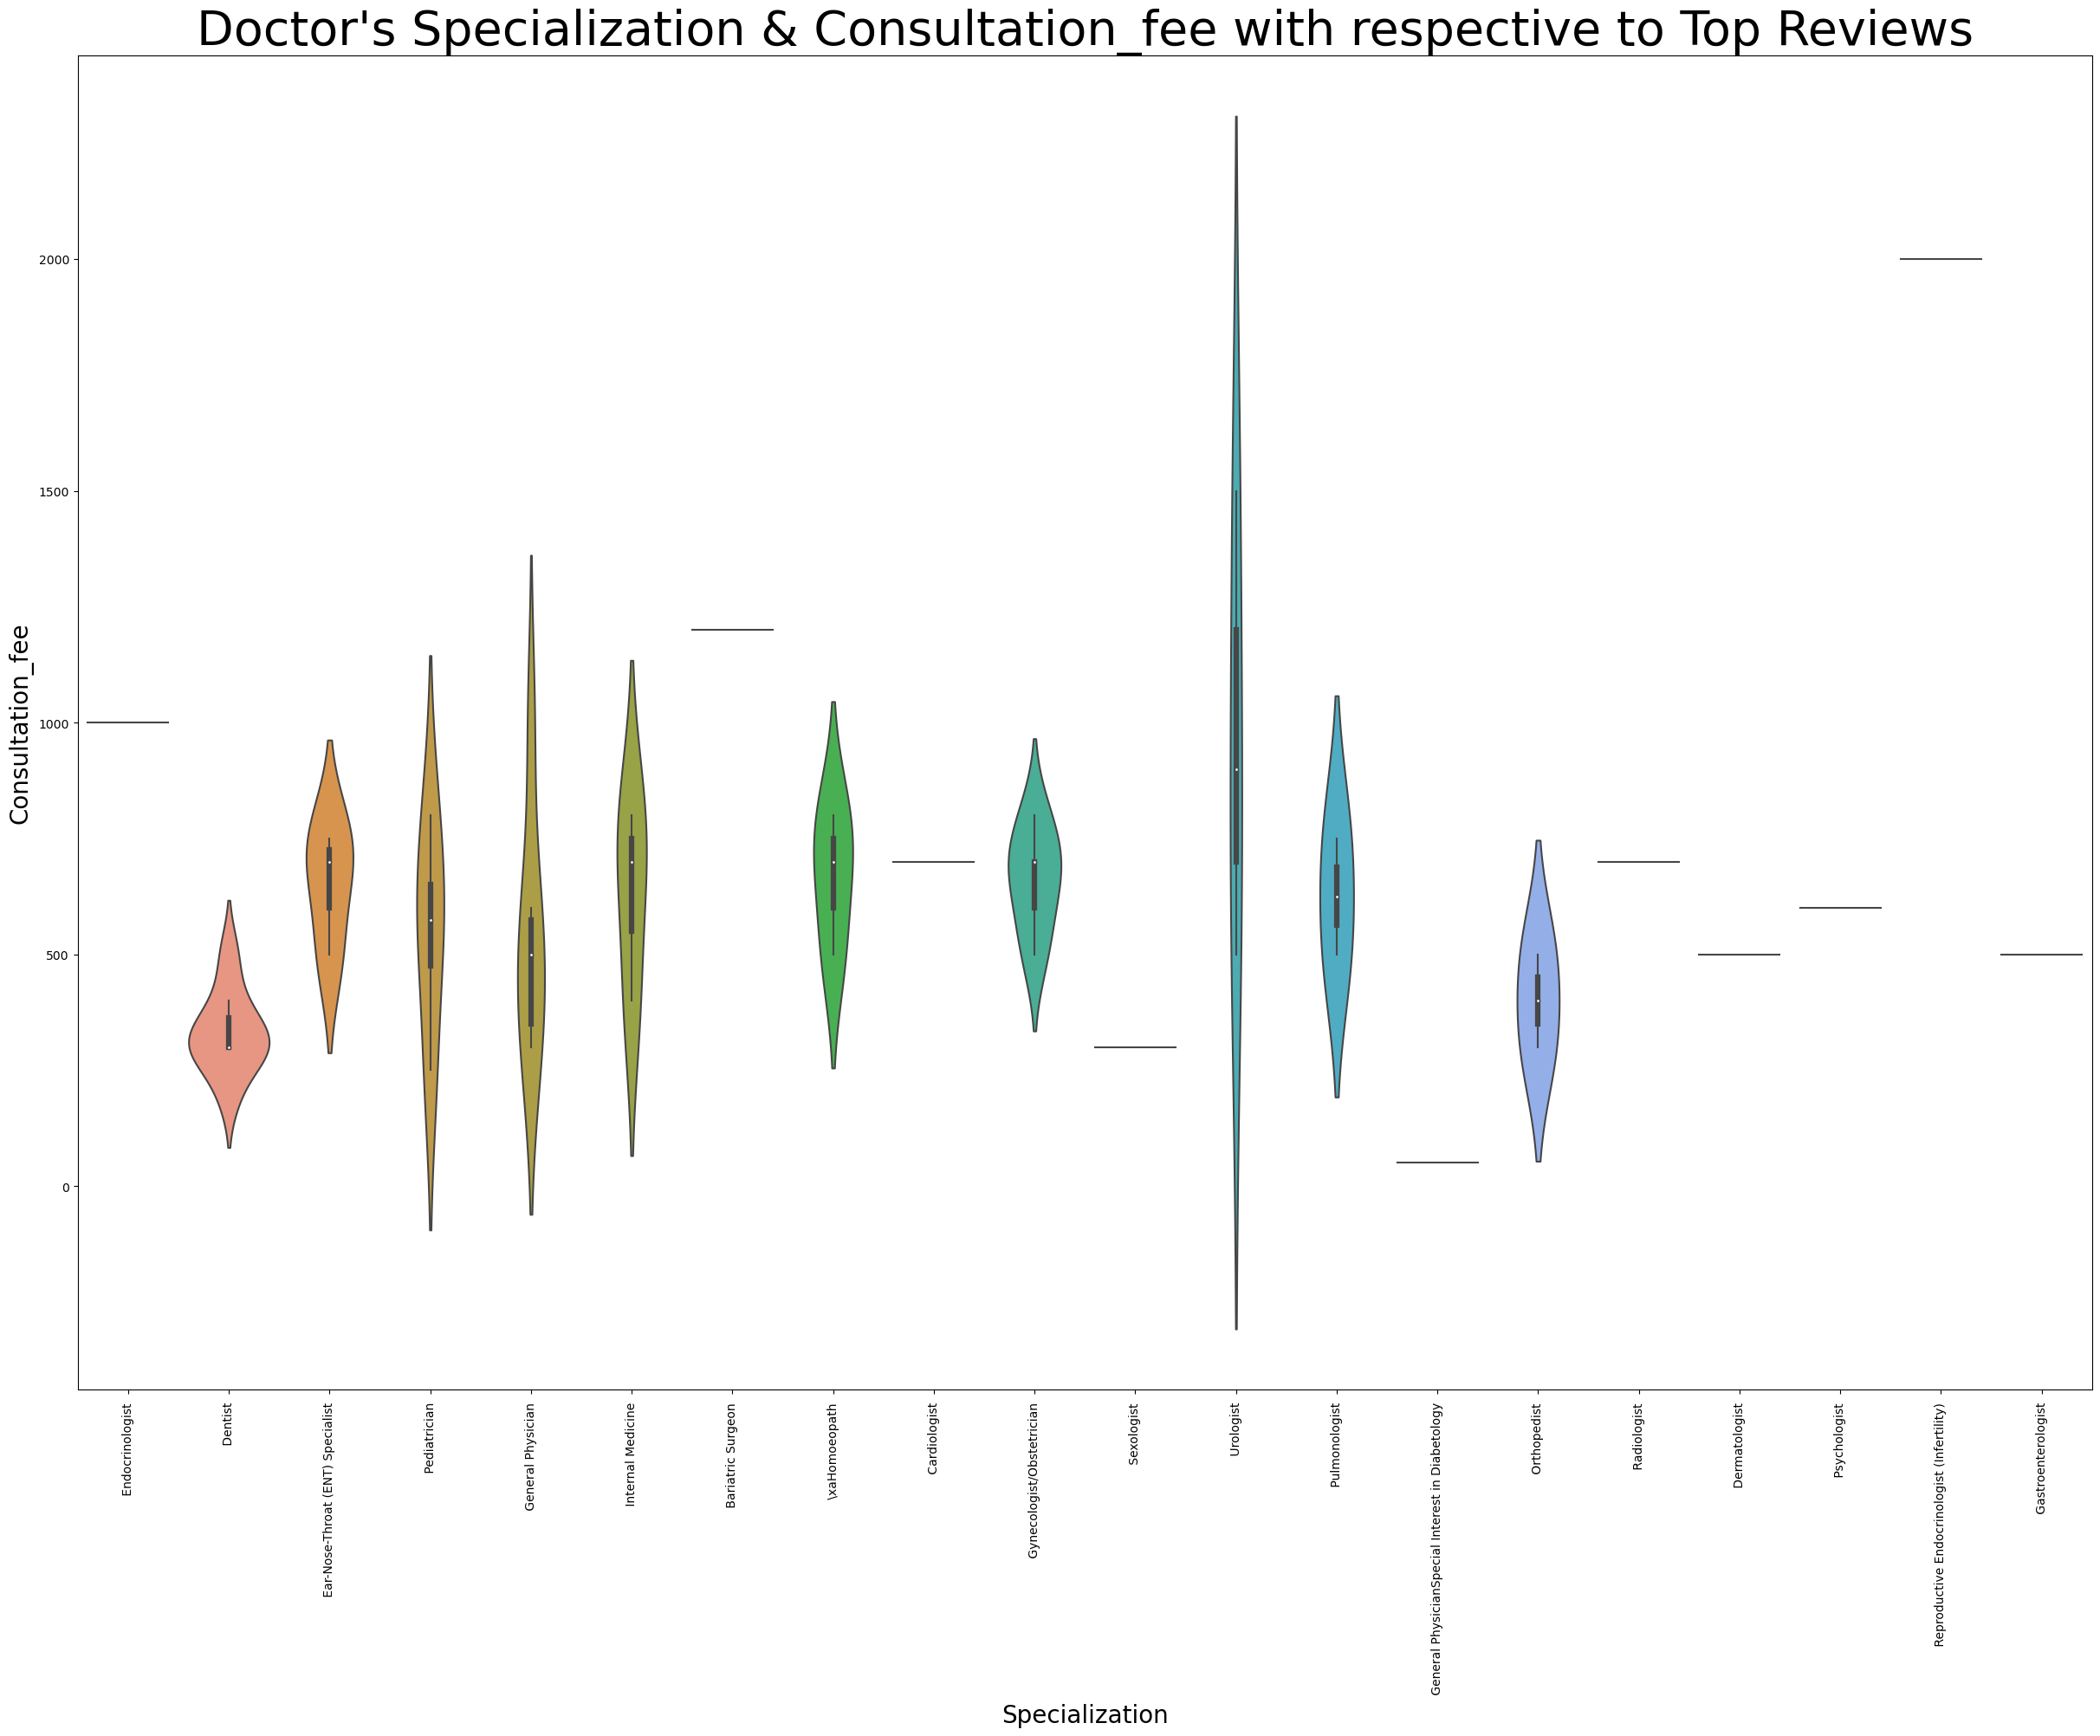

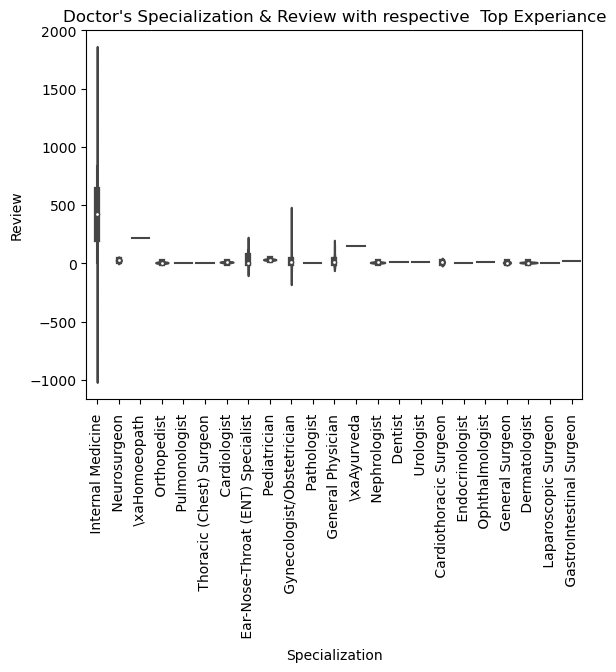

In [9]:
plt.figure(figsize=(30,20))
a=sns.violinplot(x='Specialization', y='Consultation_fee', data=top_review)
plt.xlabel("Specialization",fontsize=20)
plt.ylabel("Consultation_fee",fontsize=20)
plt.title("Doctor's Specialization & Consultation_fee with respective to Top Reviews",fontsize=40)
plt.xticks(rotation=90)
plt.show()

a=sns.violinplot(x='Specialization', y='Review', data=top_exp)
plt.title("Doctor's Specialization & Review with respective  Top Experiance")
plt.xticks(rotation=90)
plt.show()




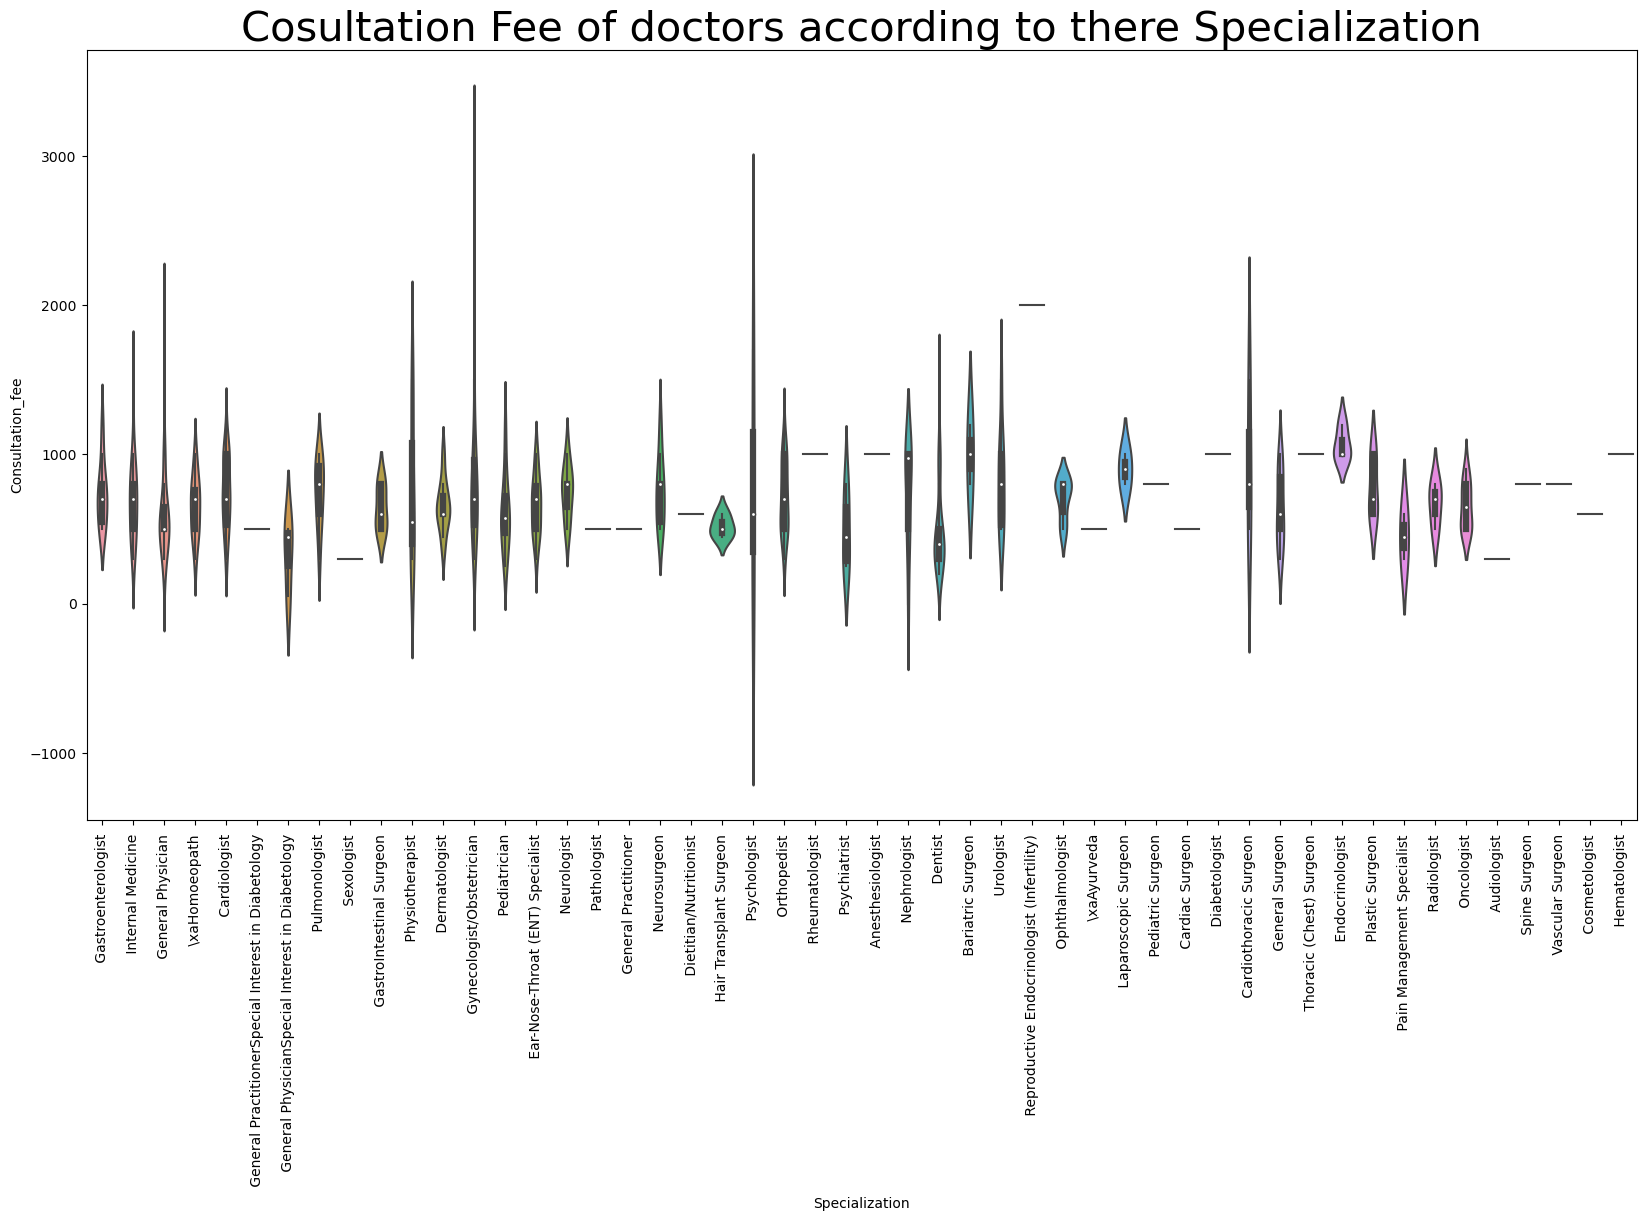

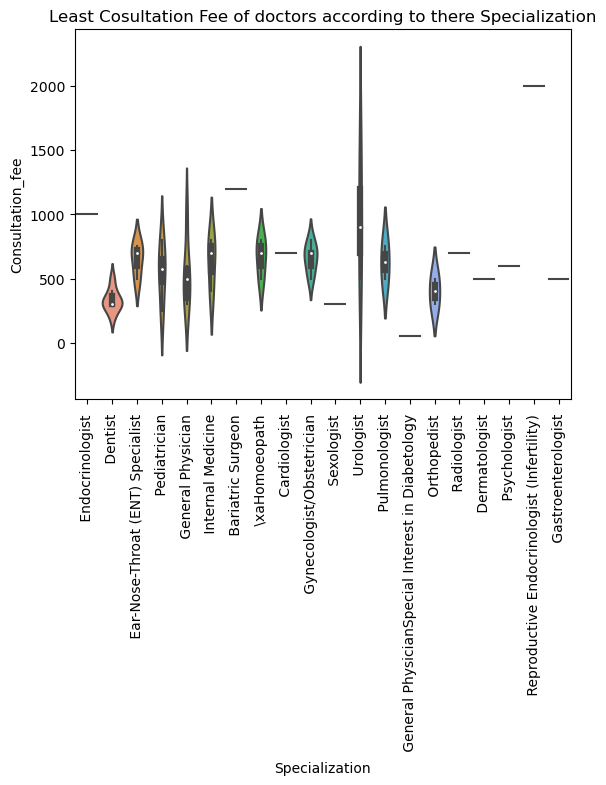

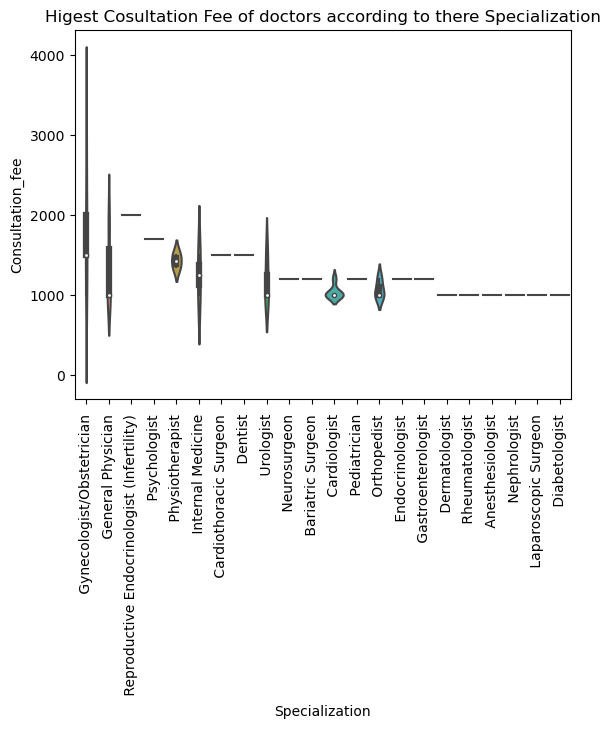

In [36]:
plt.figure(figsize=(20,10))
sns.violinplot(x='Specialization', y='Consultation_fee', data=df)
plt.title("Cosultation Fee of doctors according to there Specialization",fontsize=30)
plt.xticks(rotation=90)
plt.show()

sns.violinplot(x='Specialization', y='Consultation_fee', data=top_review)
plt.title("Least Cosultation Fee of doctors according to there Specialization")
plt.xticks(rotation=90)
plt.show()

sns.violinplot(x='Specialization', y='Consultation_fee', data=high_fee)
plt.title("Higest Cosultation Fee of doctors according to there Specialization")
plt.xticks(rotation=90)
plt.show()


C:\saipraveen\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


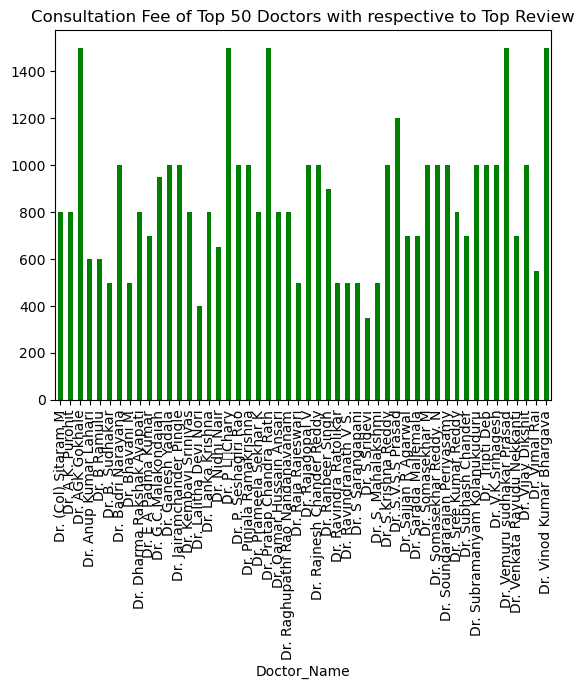

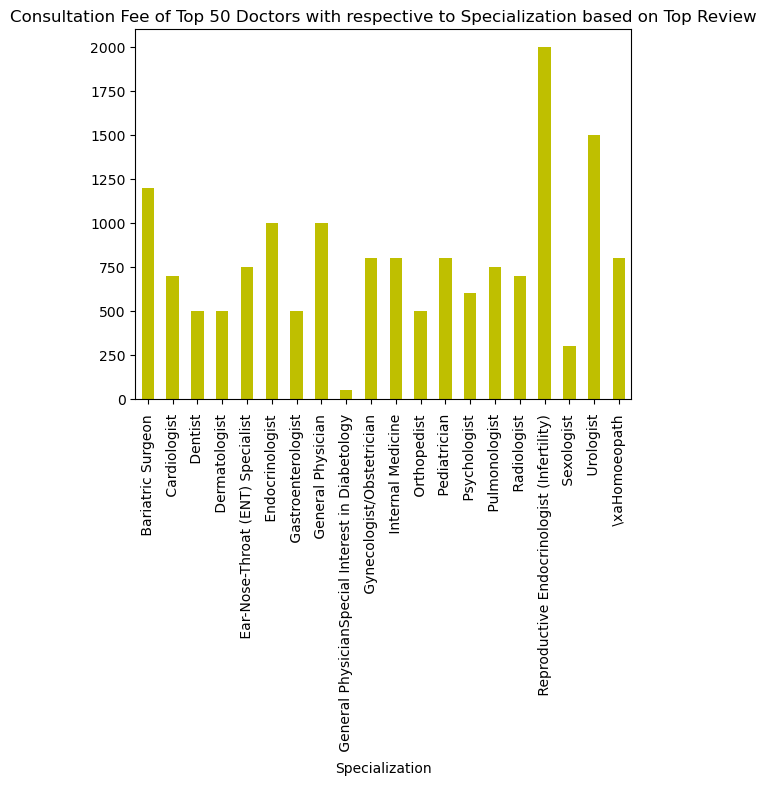

In [36]:
df.groupby(top_exp['Doctor_Name'])['Consultation_fee'].max().plot(kind='bar',color='g')
plt.title("Consultation Fee of Top 50 Doctors with respective to Top Review")
plt.show()

df.groupby(top_review['Specialization'])['Consultation_fee'].max().plot(kind='bar',color='y')
plt.title("Consultation Fee of Top 50 Doctors with respective to Specialization based on Top Review")
plt.show()



